In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [293]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [294]:
train_df.head()

,Index counter,carat,cut,color,clarity,depth,table,price,x,y,z
0,19498,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
1,31230,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
2,22312,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
3,279,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
4,6647,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67


In [295]:
train_df.shape

(37758, 11)

# Data Information and Description:

In [296]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37758 entries, 0 to 37757
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index counter  37758 non-null  int64  
 1   carat          37758 non-null  float64
 2   cut            37758 non-null  object 
 3   color          37758 non-null  object 
 4   clarity        37758 non-null  object 
 5   depth          37758 non-null  float64
 6   table          37758 non-null  float64
 7   price          37758 non-null  int64  
 8   x              37758 non-null  float64
 9   y              37758 non-null  float64
 10  z              37758 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


In [297]:
train_df.describe()

,Index counter,carat,depth,table,price,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,27023.205096,0.799763,61.744923,57.461129,3951.495312,5.735377,5.738825,3.541152
std,15562.754196,0.475556,1.428630,2.226637,4006.428295,1.122262,1.146605,0.711444
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13567.250000,0.400000,61.000000,56.000000,956.000000,4.720000,4.730000,2.910000
50%,26974.500000,0.700000,61.800000,57.000000,2404.000000,5.700000,5.710000,3.530000
75%,40527.500000,1.040000,62.500000,59.000000,5366.750000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [ ]:
#train_df = train_df.drop_duplicates()

In [299]:
train_df.shape

(37758, 11)

In [300]:
train_df.skew()

Index counter   -0.000287
carat            1.124371
depth           -0.100112
table            0.818395
price            1.609741
x                0.384282
y                2.985308
z                1.984829
dtype: float64

# EDA:

<AxesSubplot:xlabel='cut', ylabel='count'>

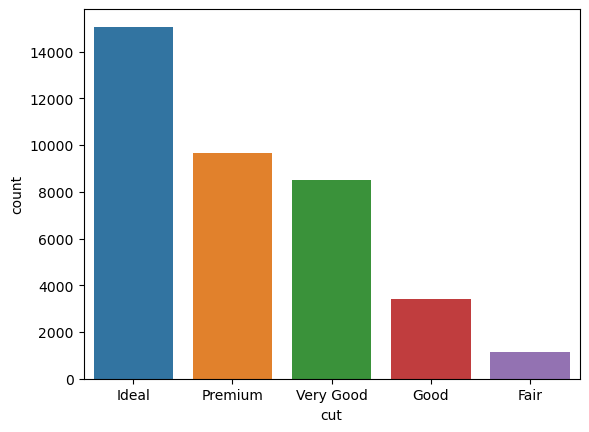

In [301]:
sns.countplot(data = train_df, x = 'cut')

<AxesSubplot:xlabel='clarity', ylabel='price'>

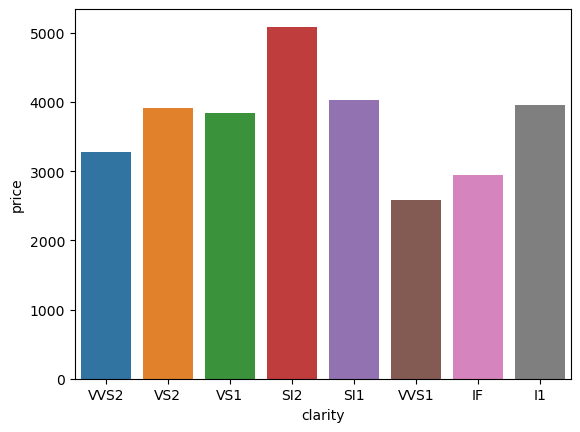

In [302]:
sns.barplot(data = train_df, x = 'clarity', y = 'price', ci = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

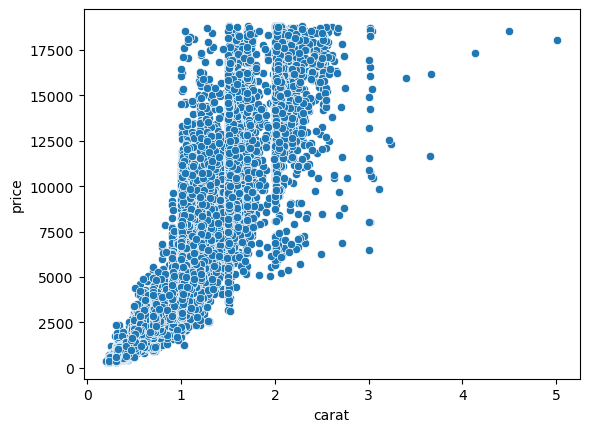

In [303]:
sns.scatterplot(data = train_df, x = 'carat', y = 'price')

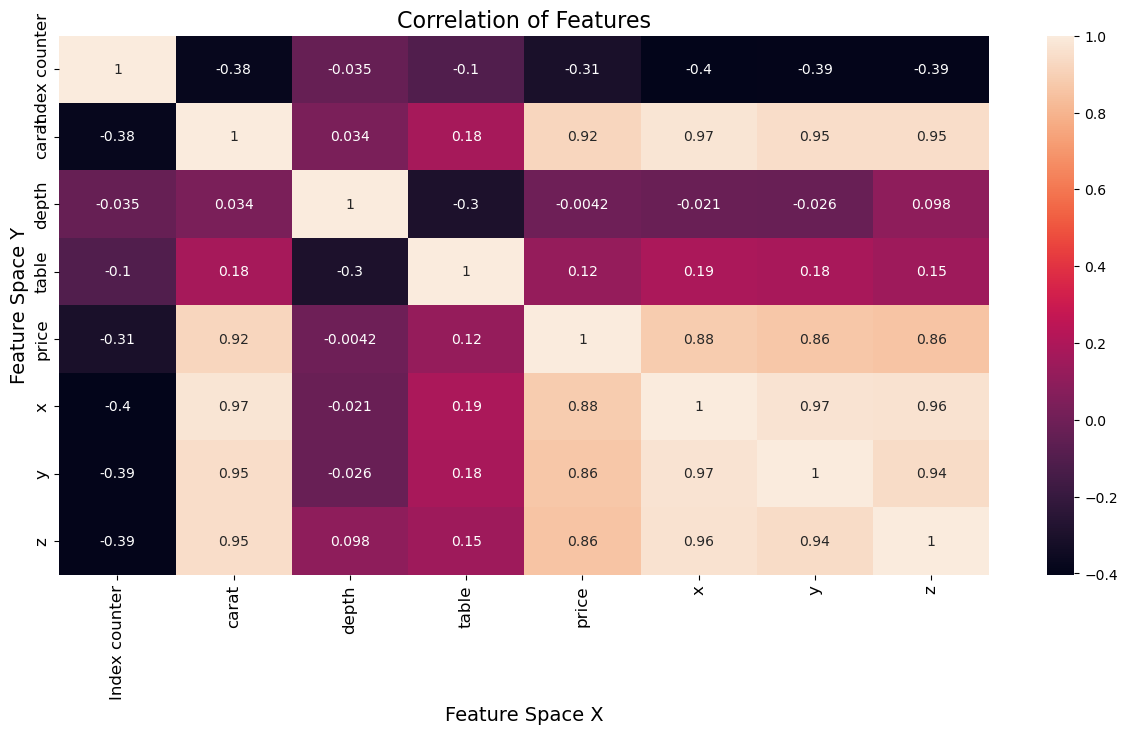

In [304]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

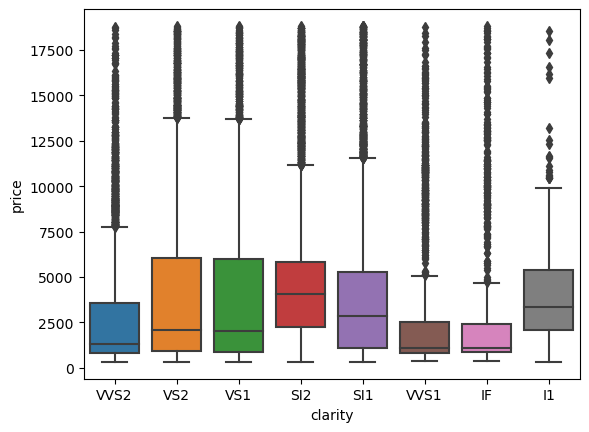

In [305]:
sns.boxplot(data = train_df, x = 'clarity', y = 'price')

<AxesSubplot:xlabel='color', ylabel='depth'>

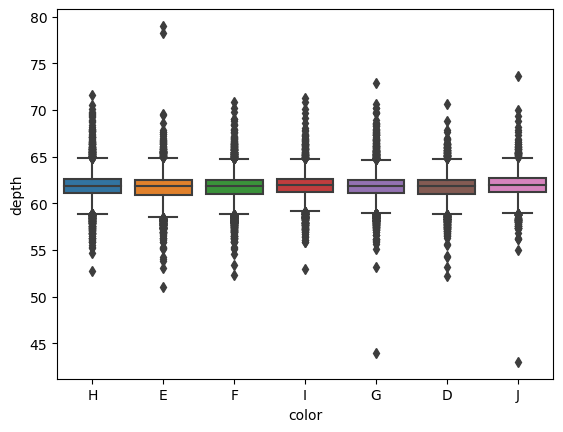

In [306]:
sns.boxplot(data = train_df, x = 'color', y = 'depth')

<AxesSubplot:xlabel='cut', ylabel='depth'>

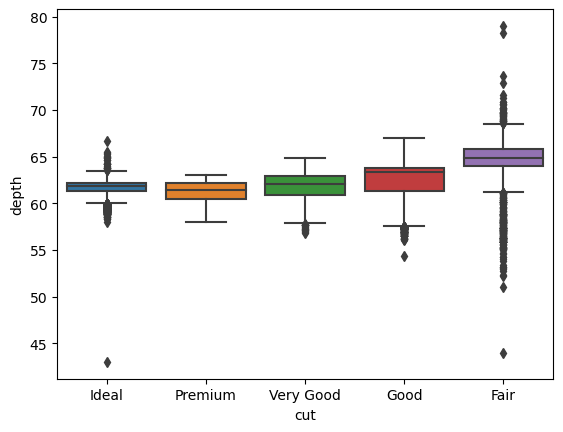

In [307]:
sns.boxplot(data = train_df, x = 'cut', y = 'depth')

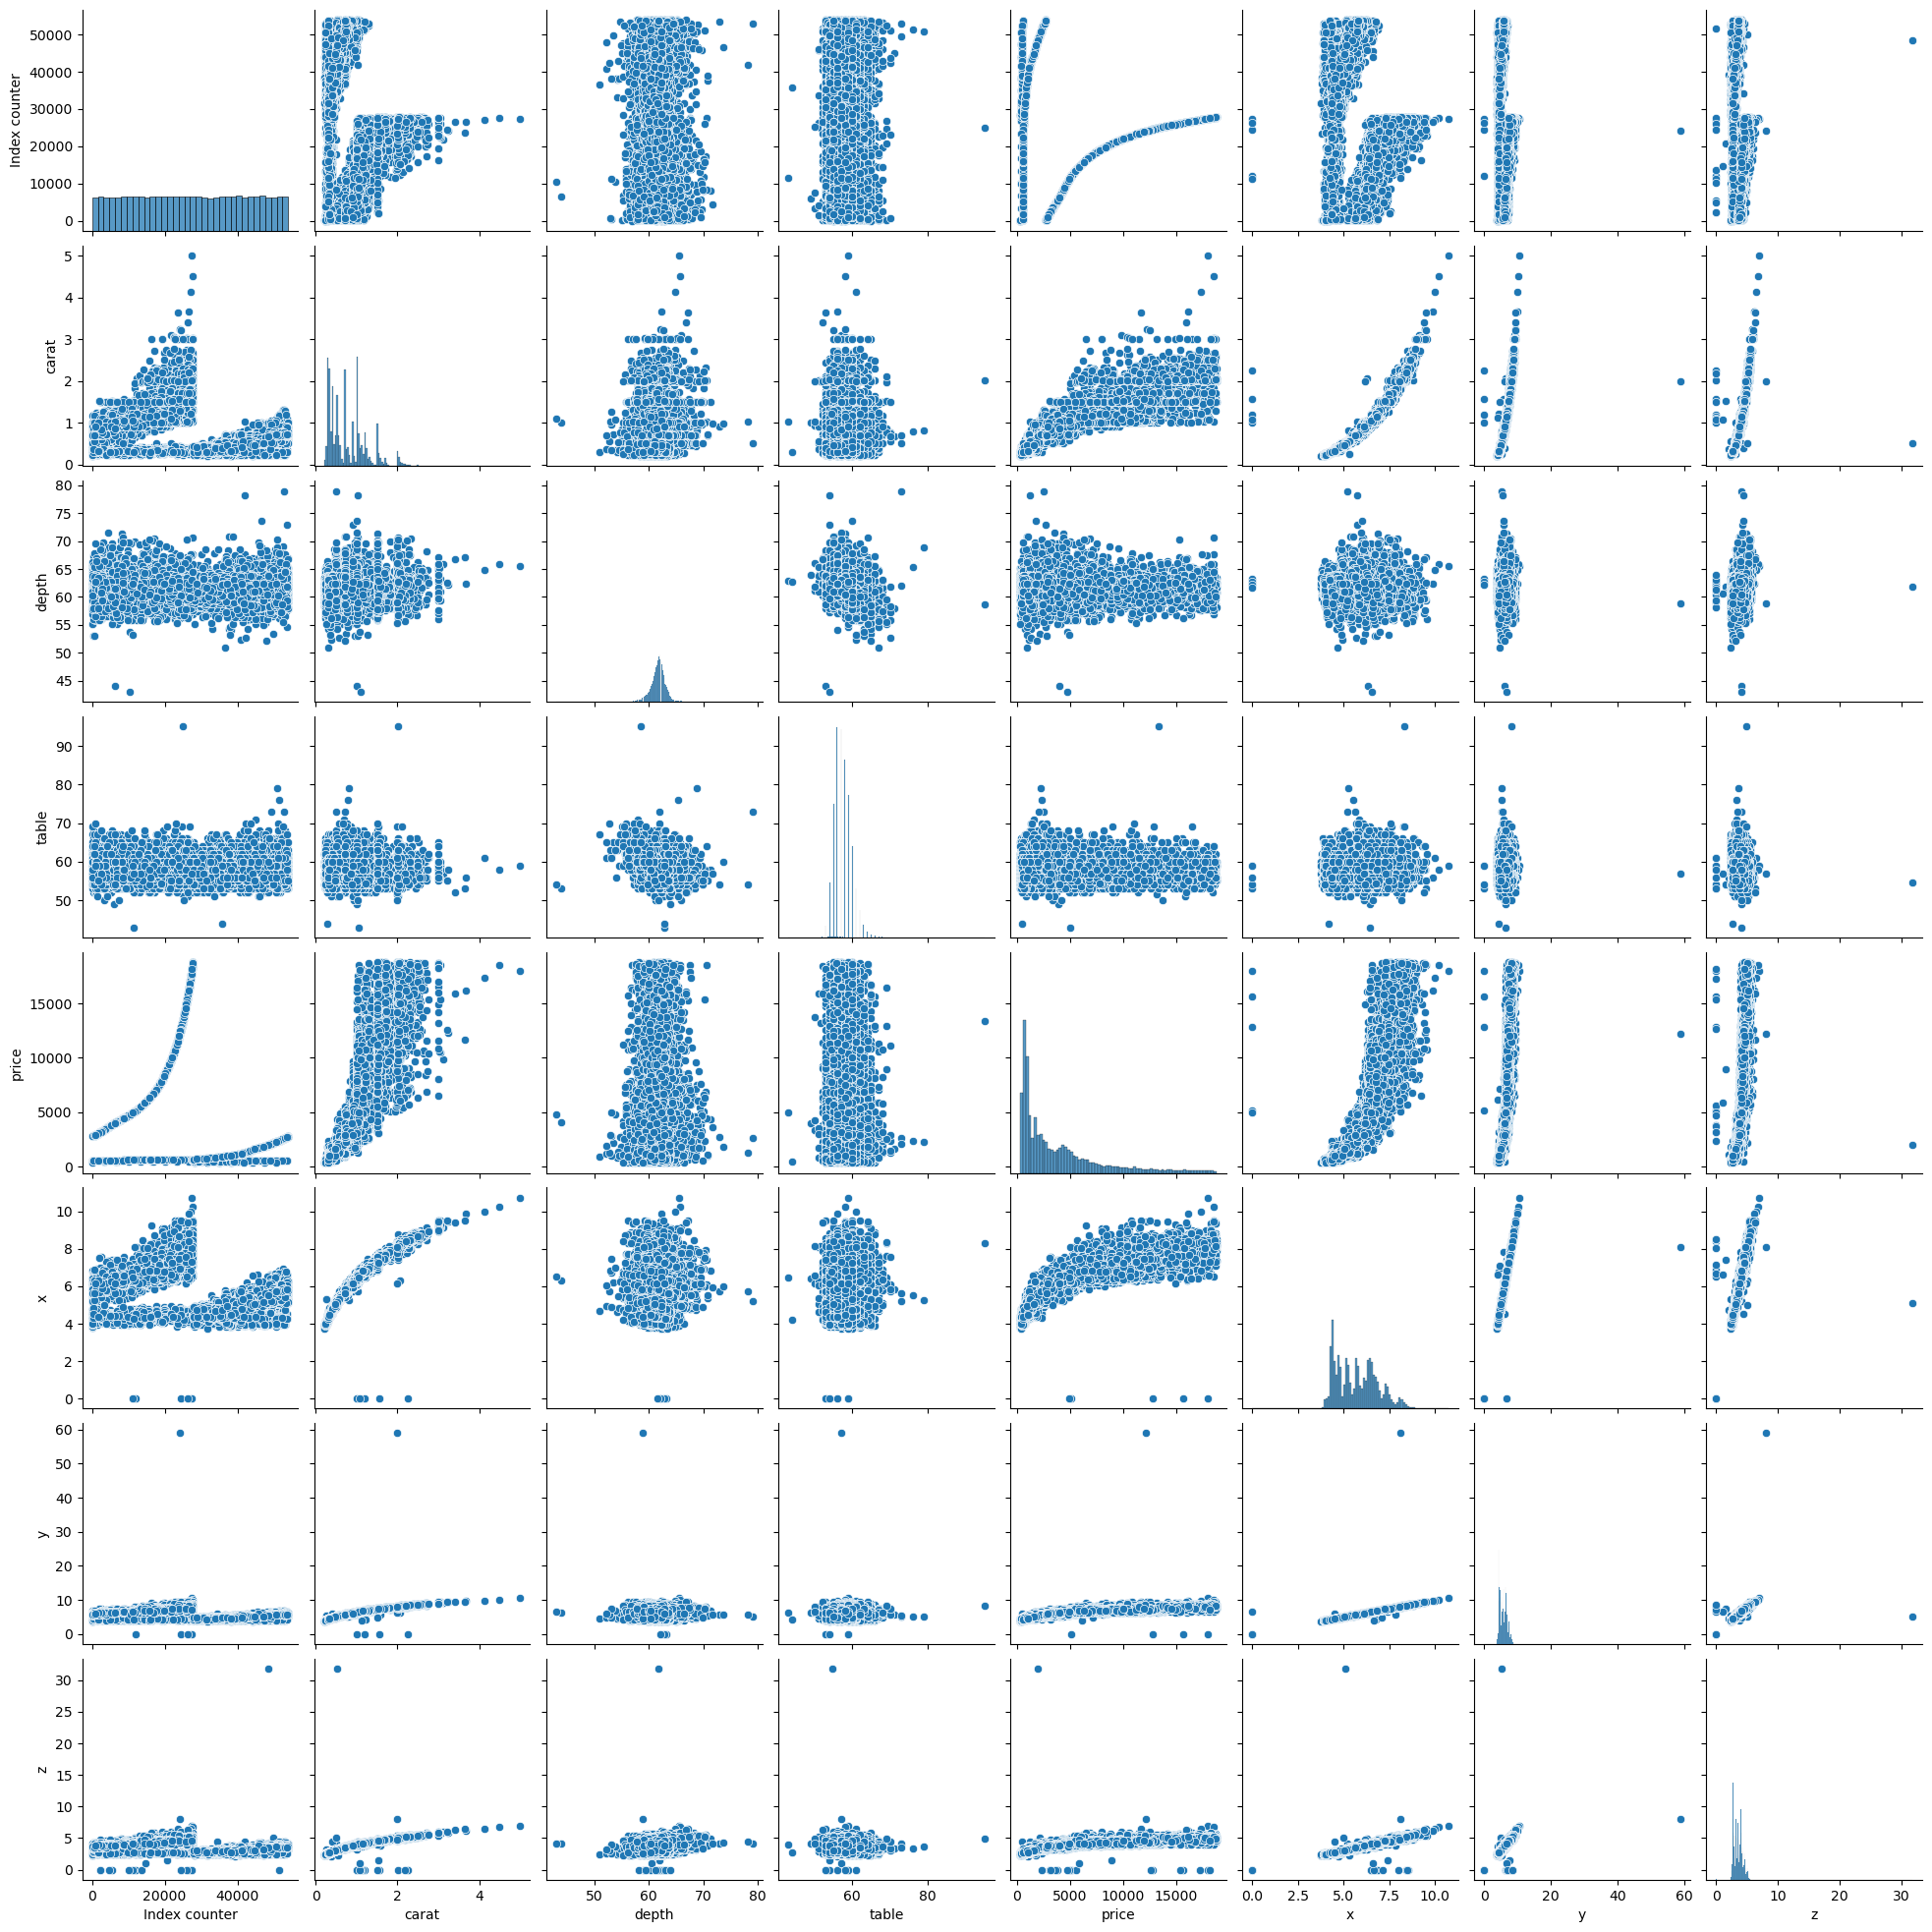

In [308]:
sns.pairplot(train_df)

In [309]:
train_df.drop('Index counter', axis = 1, inplace = True)

In [310]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 0 to 37757
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37758 non-null  float64
 1   cut      37758 non-null  object 
 2   color    37758 non-null  object 
 3   clarity  37758 non-null  object 
 4   depth    37758 non-null  float64
 5   table    37758 non-null  float64
 6   price    37758 non-null  int64  
 7   x        37758 non-null  float64
 8   y        37758 non-null  float64
 9   z        37758 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


In [311]:
train_df = train_df[(train_df['x'] < 30)]
train_df = train_df[(train_df['y'] < 30)]
train_df = train_df[(train_df['z'] < 30) & (train_df['z'] > 2)]
train_df = train_df[(train_df['table'] < 80) & (train_df['table'] > 40)]
train_df = train_df[(train_df['depth'] < 75) & (train_df['depth'] > 45)]

In [312]:
train_df.skew()

carat    1.124920
depth   -0.078231
table    0.694491
price    1.610296
x        0.402114
y        0.395784
z        0.401296
dtype: float64

In [313]:
train_df = pd.get_dummies(train_df)

In [315]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37733 entries, 0 to 37757
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          37733 non-null  float64
 1   depth          37733 non-null  float64
 2   table          37733 non-null  float64
 3   price          37733 non-null  int64  
 4   x              37733 non-null  float64
 5   y              37733 non-null  float64
 6   z              37733 non-null  float64
 7   cut_Fair       37733 non-null  uint8  
 8   cut_Good       37733 non-null  uint8  
 9   cut_Ideal      37733 non-null  uint8  
 10  cut_Premium    37733 non-null  uint8  
 11  cut_Very Good  37733 non-null  uint8  
 12  color_D        37733 non-null  uint8  
 13  color_E        37733 non-null  uint8  
 14  color_F        37733 non-null  uint8  
 15  color_G        37733 non-null  uint8  
 16  color_H        37733 non-null  uint8  
 17  color_I        37733 non-null  uint8  
 18  color_

In [316]:
train_df.skew()

carat            1.124920
depth           -0.078231
table            0.694491
price            1.610296
x                0.402114
y                0.395784
z                0.401296
cut_Fair         5.545565
cut_Good         2.860330
cut_Ideal        0.412234
cut_Premium      1.121843
cut_Very Good    1.312783
color_D          2.265178
color_E          1.652882
color_F          1.682836
color_G          1.442184
color_H          1.900968
color_I          2.666920
color_J          4.029802
clarity_I1       8.435103
clarity_IF       5.222179
clarity_SI1      1.191291
clarity_SI2      1.765786
clarity_VS1      1.942530
clarity_VS2      1.301217
clarity_VVS1     3.429549
clarity_VVS2     2.799678
dtype: float64

carat


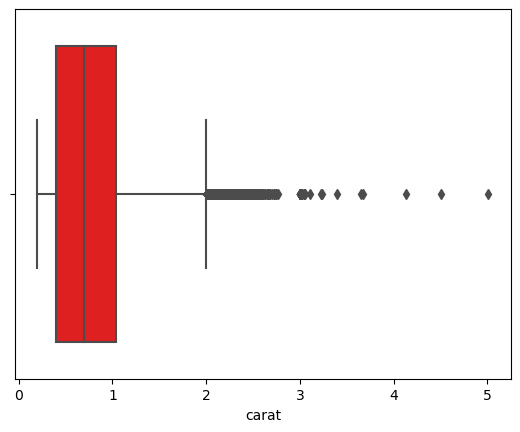

depth


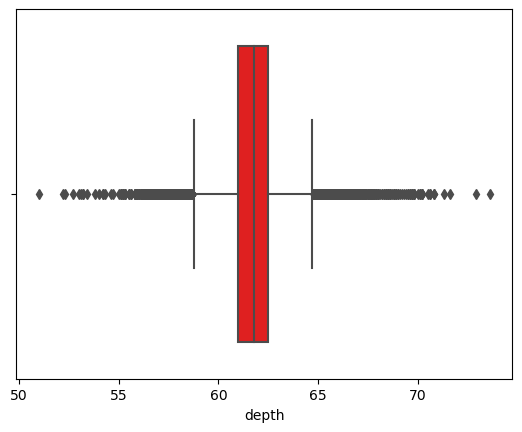

table


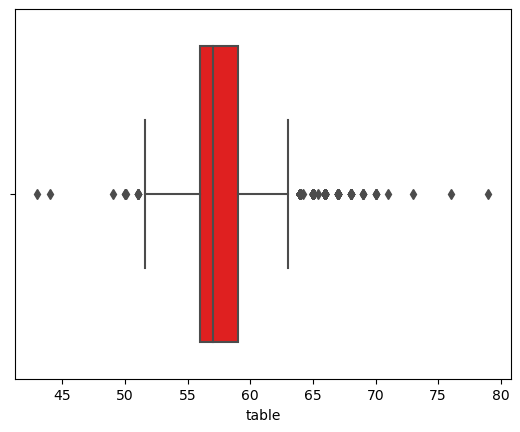

price


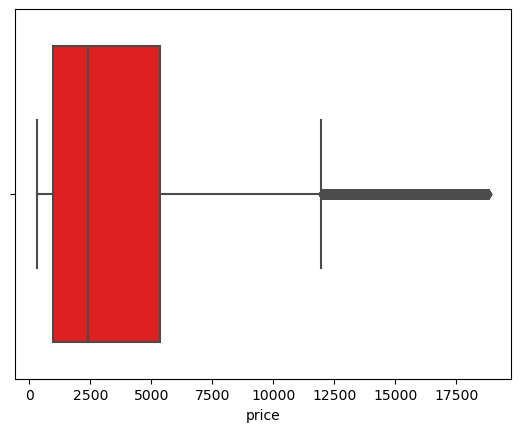

x


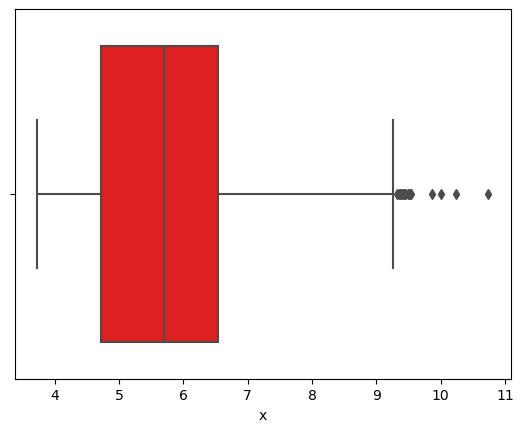

y


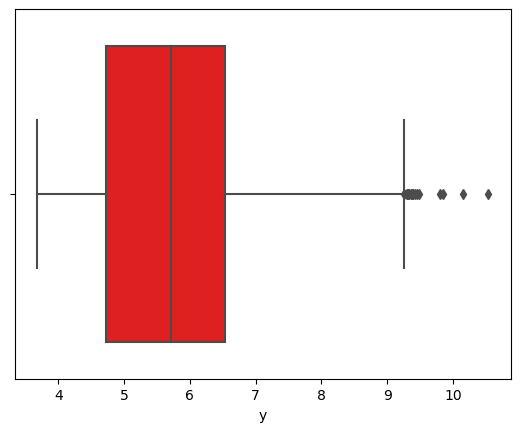

z


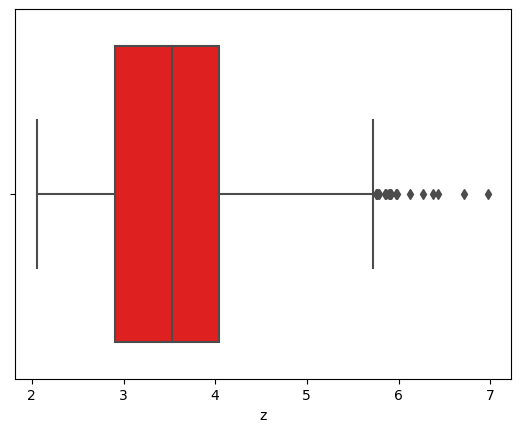

cut_Fair


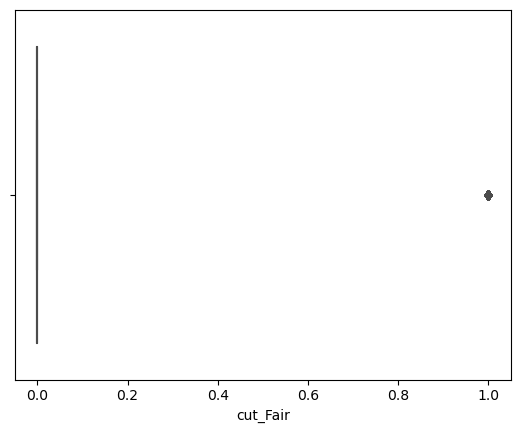

cut_Good


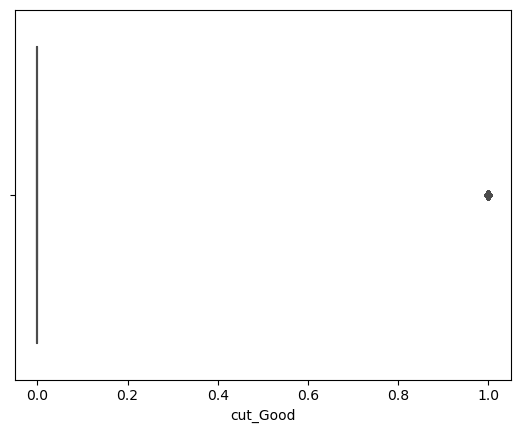

cut_Ideal


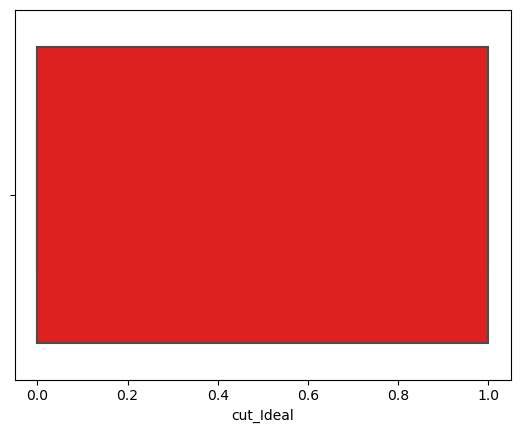

cut_Premium


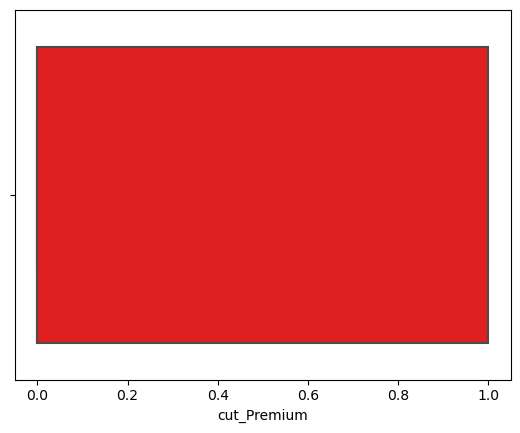

cut_Very Good


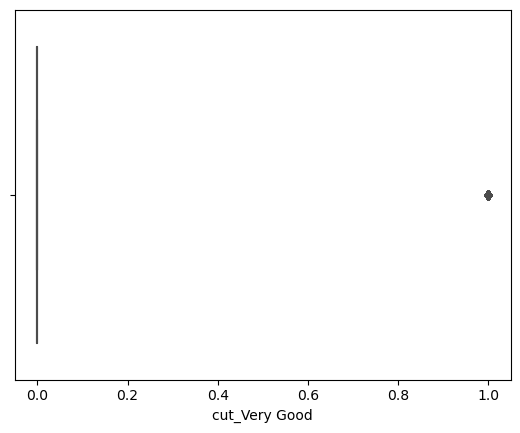

color_D


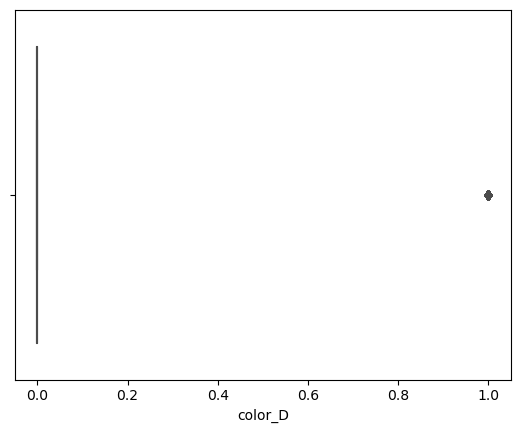

color_E


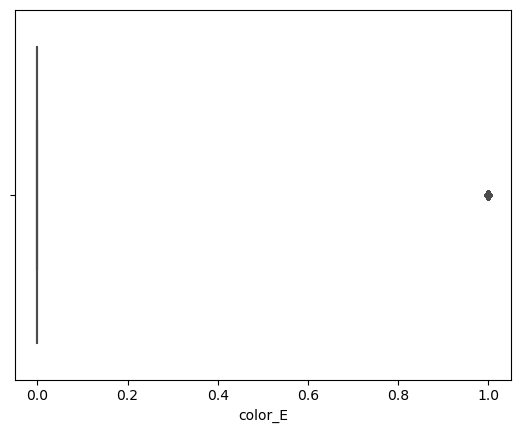

color_F


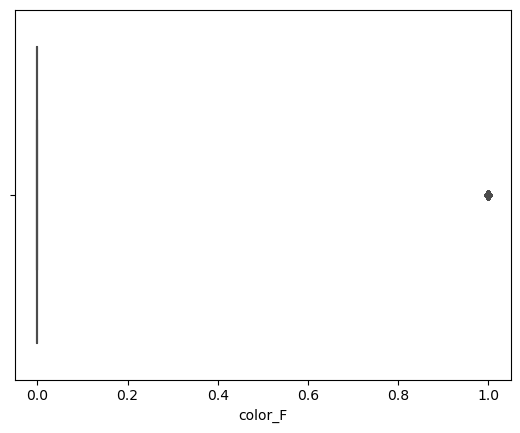

color_G


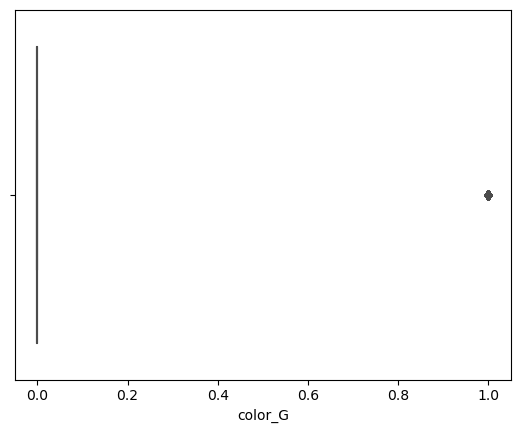

color_H


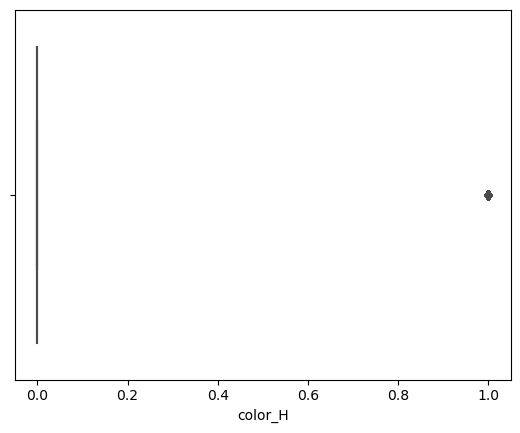

color_I


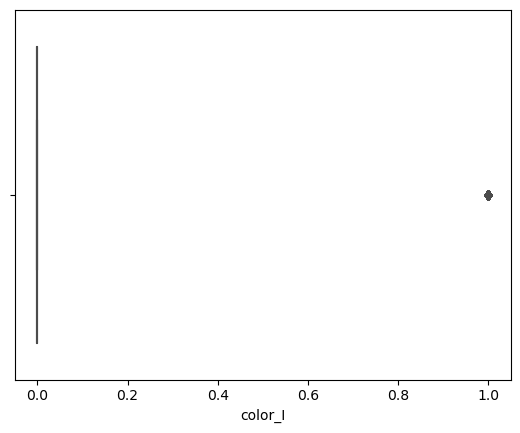

color_J


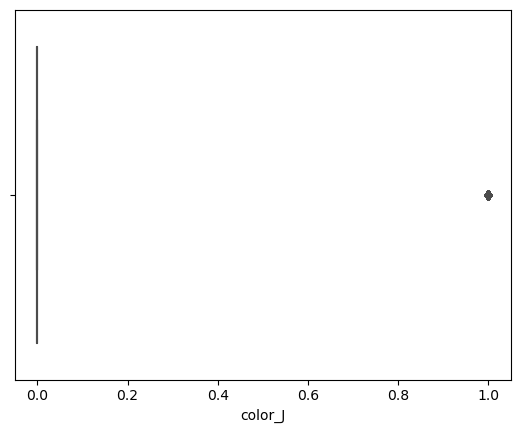

clarity_I1


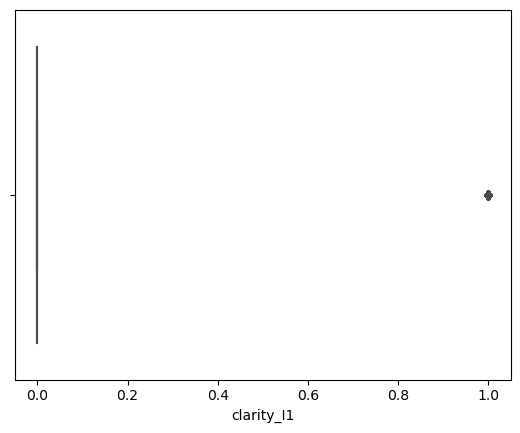

clarity_IF


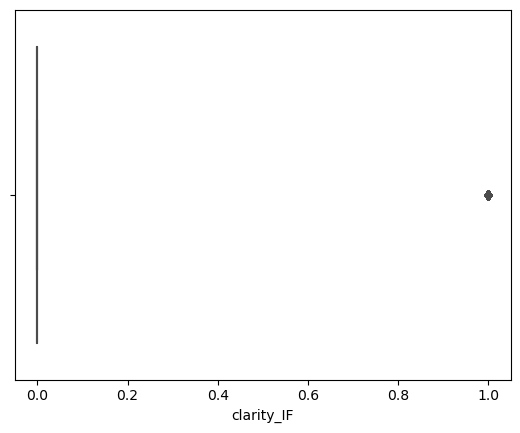

clarity_SI1


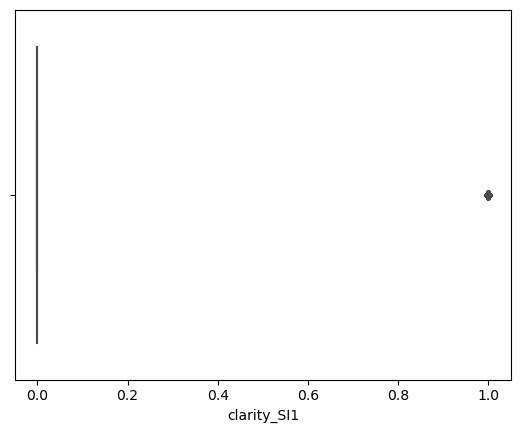

clarity_SI2


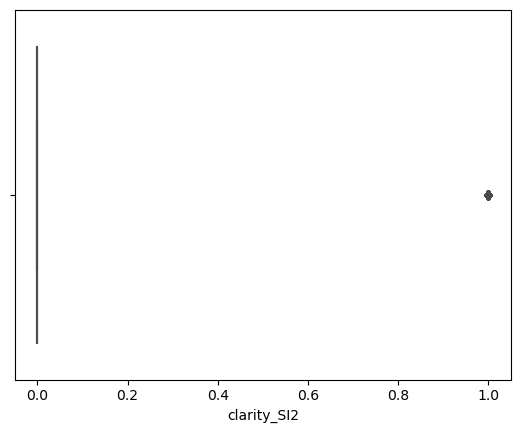

clarity_VS1


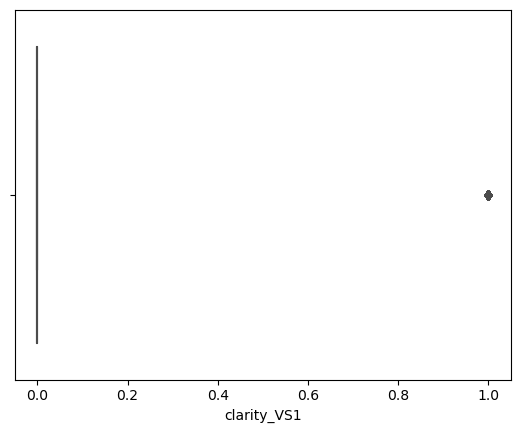

clarity_VS2


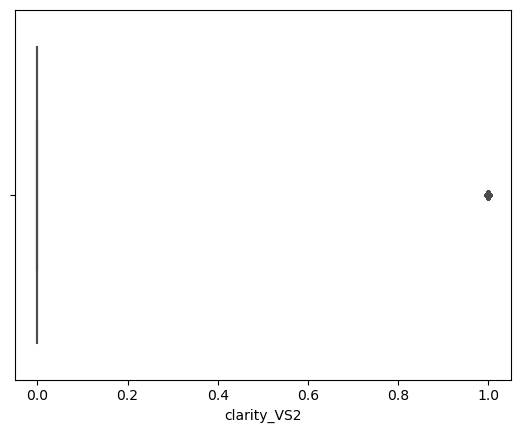

clarity_VVS1


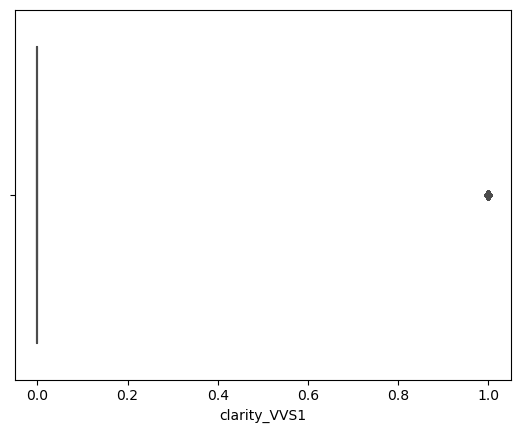

clarity_VVS2


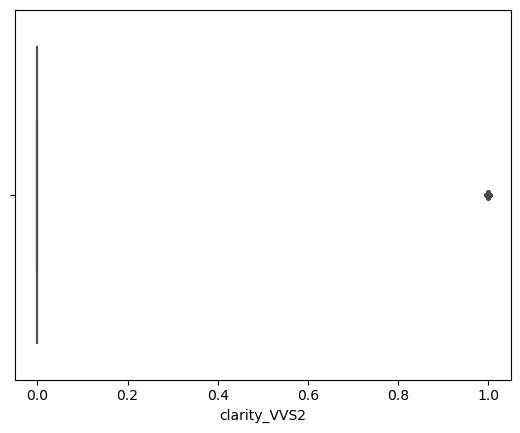

In [317]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [318]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

carat


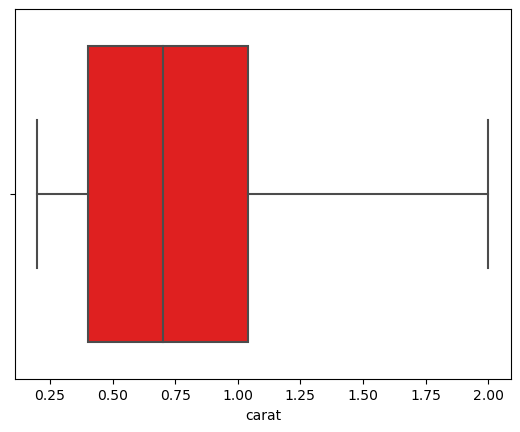

depth


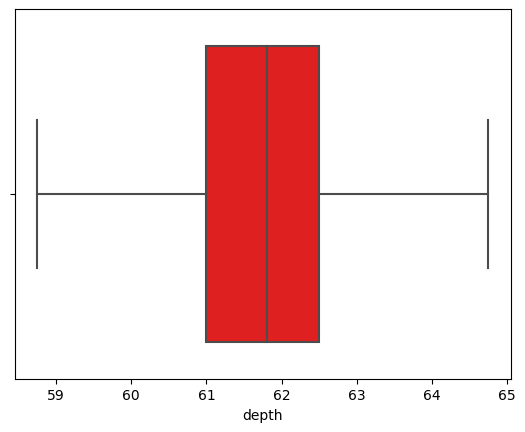

table


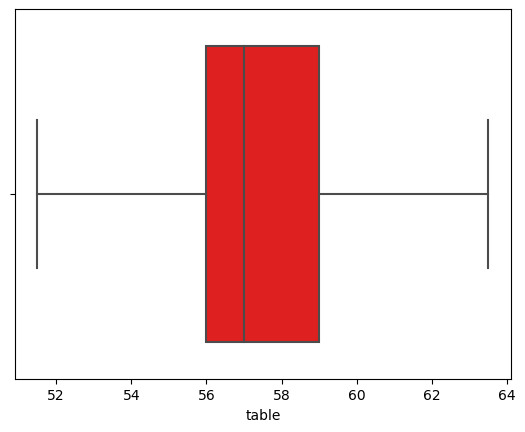

price


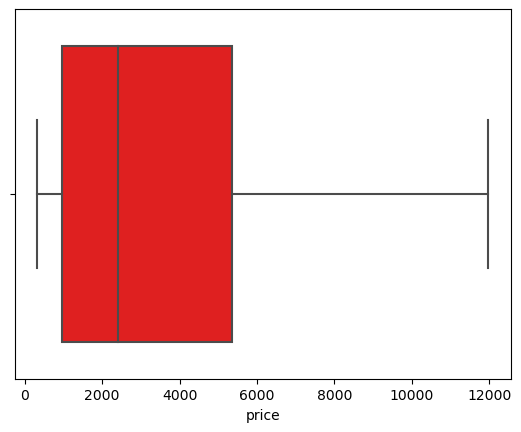

x


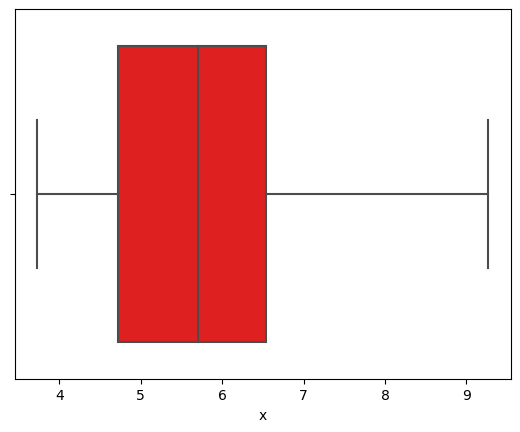

y


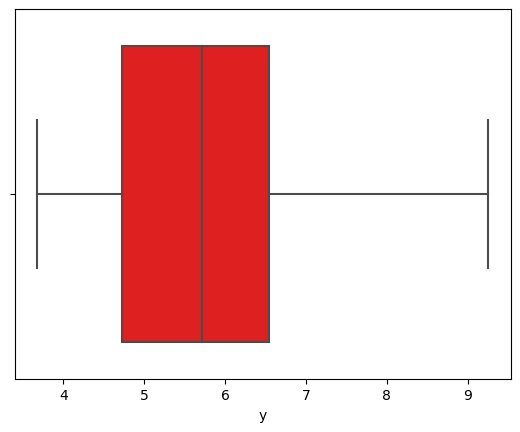

z


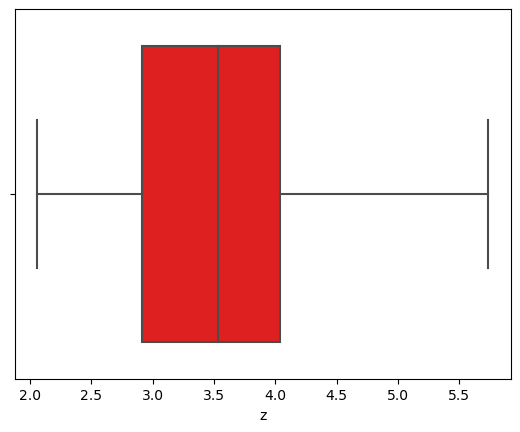

cut_Fair


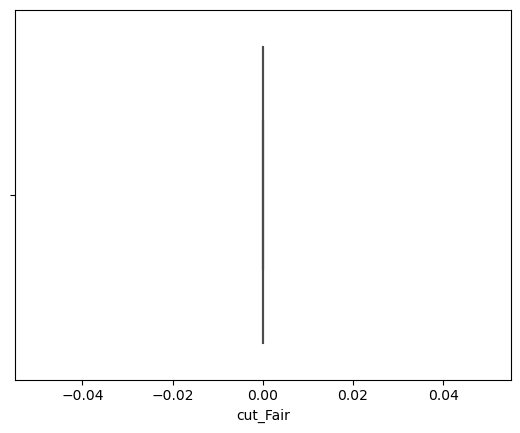

cut_Good


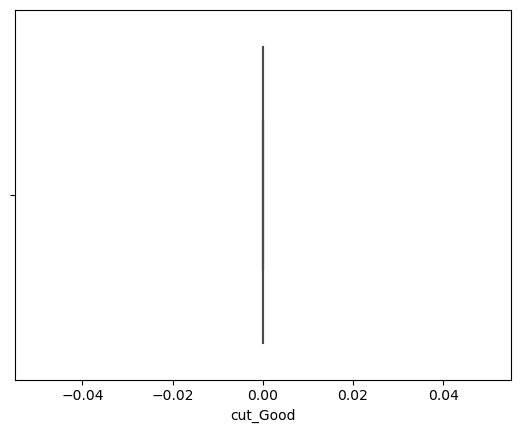

cut_Ideal


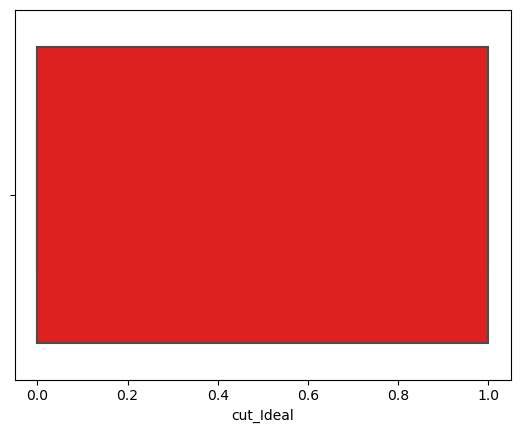

cut_Premium


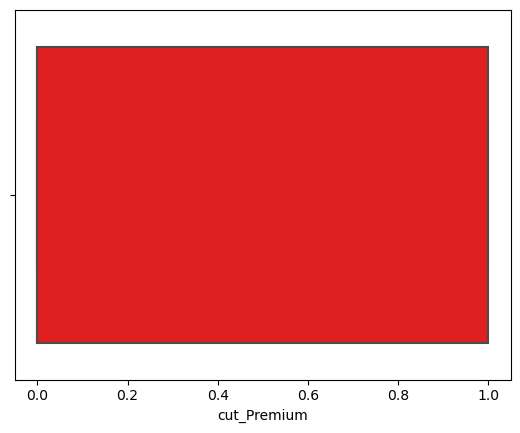

cut_Very Good


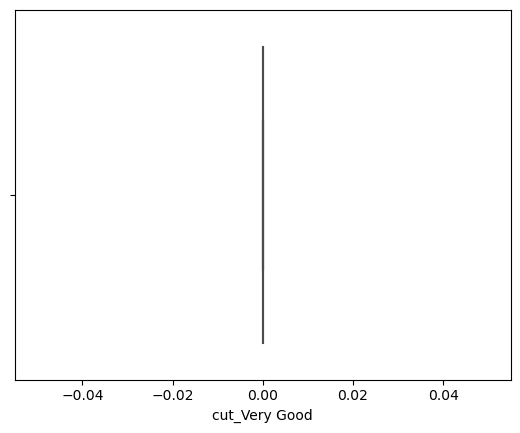

color_D


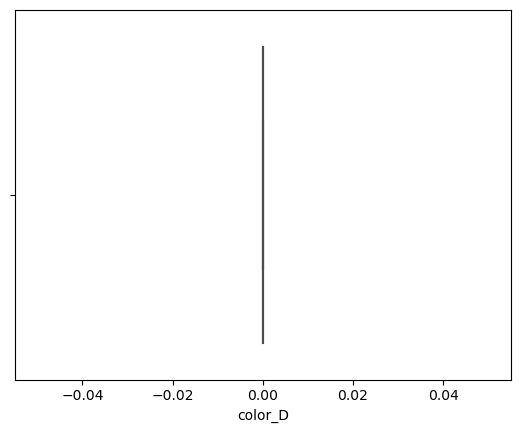

color_E


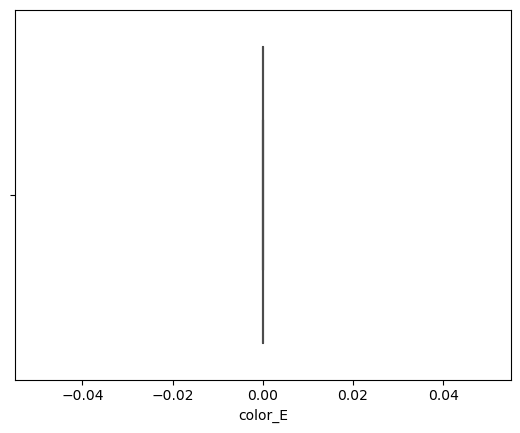

color_F


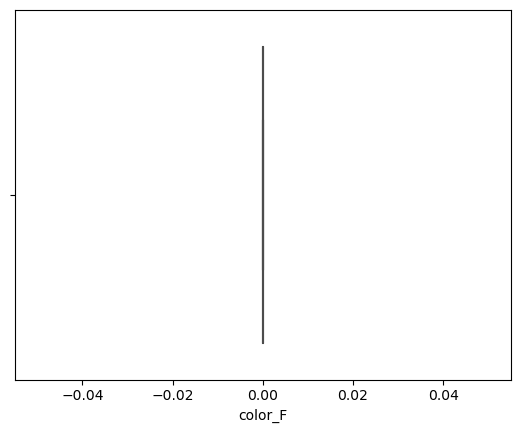

color_G


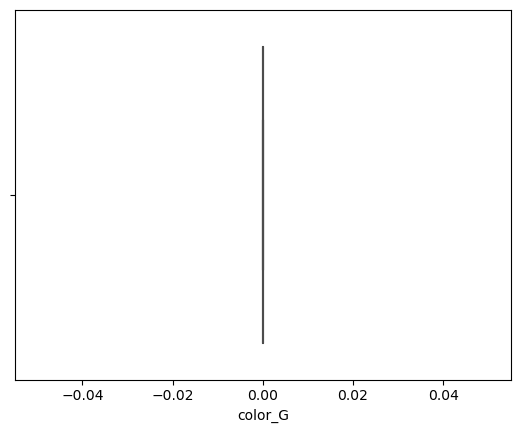

color_H


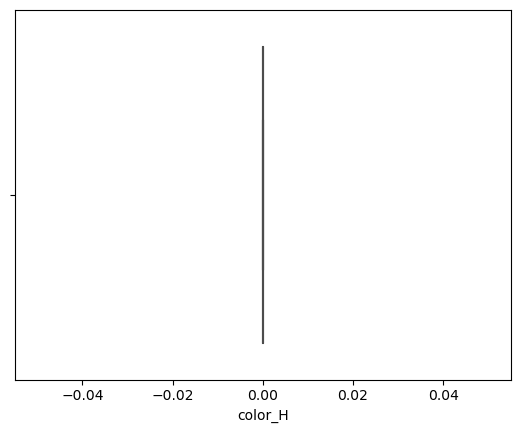

color_I


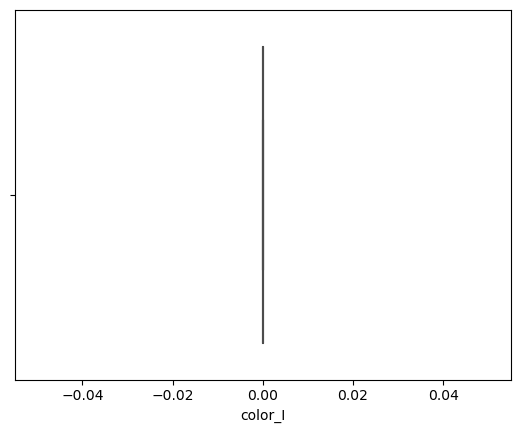

color_J


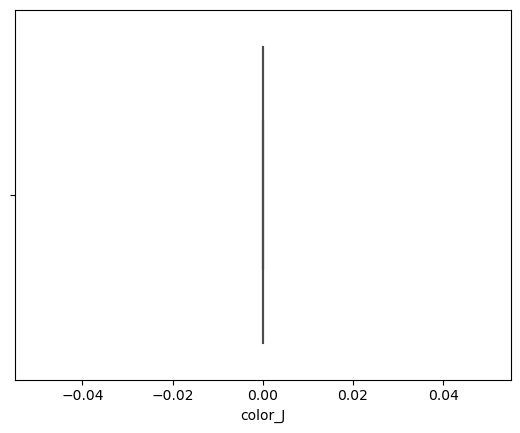

clarity_I1


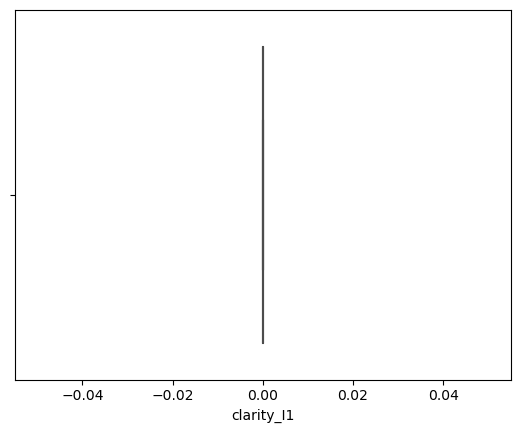

clarity_IF


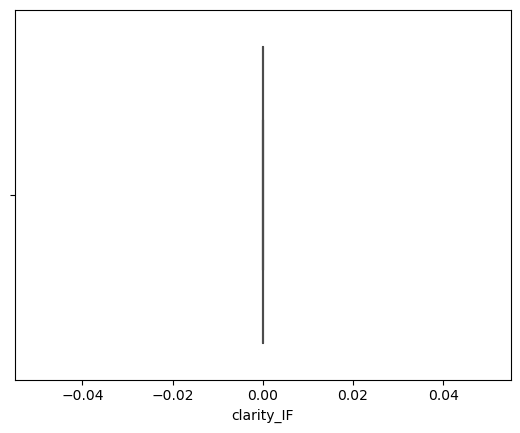

clarity_SI1


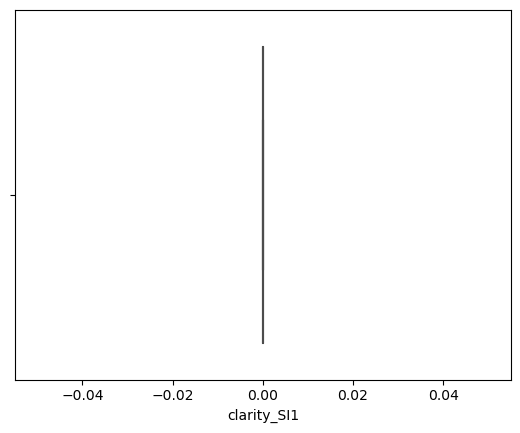

clarity_SI2


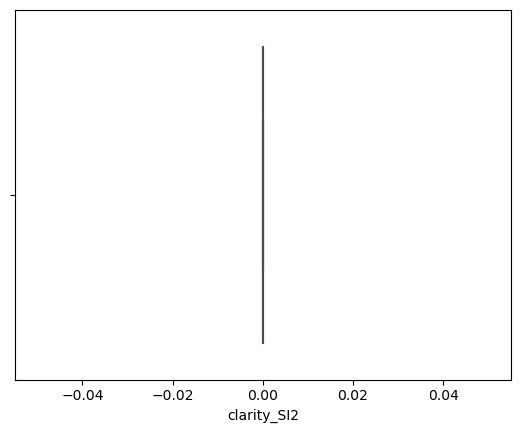

clarity_VS1


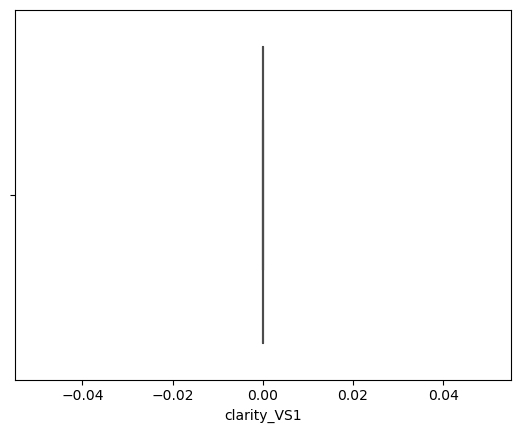

clarity_VS2


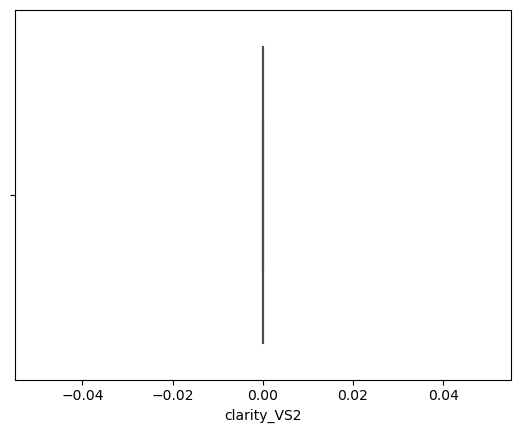

clarity_VVS1


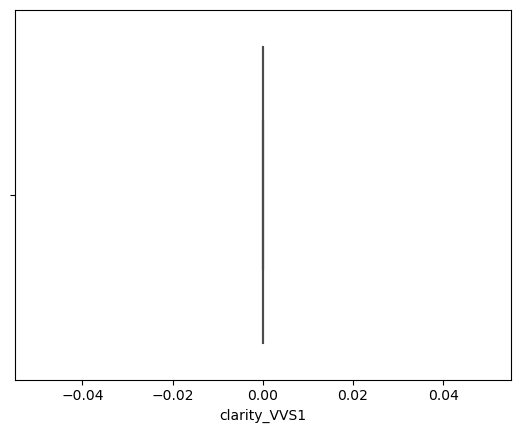

clarity_VVS2


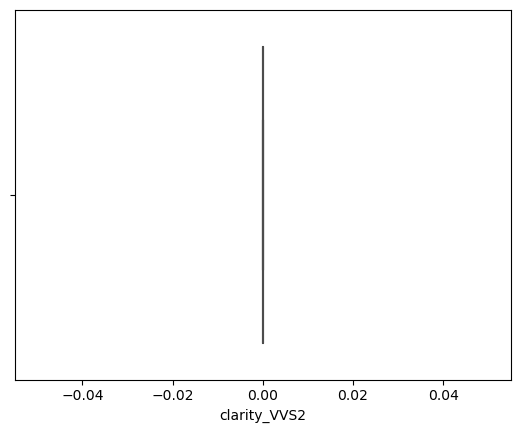

In [319]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [320]:
x = df_train.drop('price', axis = 1)
y = df_train['price']

In [321]:
x

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,61.3,57.0,6.92,6.87,4.23,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.31,62.0,56.0,4.38,4.36,2.71,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.21,62.4,57.0,6.75,6.83,4.24,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.81,62.6,55.0,5.92,5.96,3.72,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.79,61.7,56.0,5.94,5.95,3.67,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,1.05,62.4,59.0,6.48,6.51,4.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37754,0.47,61.0,55.0,5.03,5.01,3.06,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37755,0.33,60.3,58.0,4.49,4.46,2.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37756,0.90,62.8,59.0,6.13,6.03,3.82,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
y

0         8131.0
1          756.0
2        10351.0
3         2795.0
4         4092.0
          ...   
37753     4975.0
37754     1617.0
37755     1014.0
37756     2871.0
37757     6320.0
Name: price, Length: 37733, dtype: float64

In [323]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 7)

In [324]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28299, 26)
(9434, 26)
(28299,)
(9434,)


In [325]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [326]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. RandomForestRegressor :

In [327]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [328]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [329]:
y_pred_rfr_train = rfr.predict(x_train)
y_pred_rfr_test = rfr.predict(x_test)

# Model Evaluation:

In [330]:
from sklearn import metrics

In [331]:
r2_train = metrics.r2_score(y_train,y_pred_rfr_train)
r2_test = metrics.r2_score(y_test,y_pred_rfr_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9852362134588825
R2 score for test set is 0.90092873065336


<AxesSubplot:xlabel='price'>

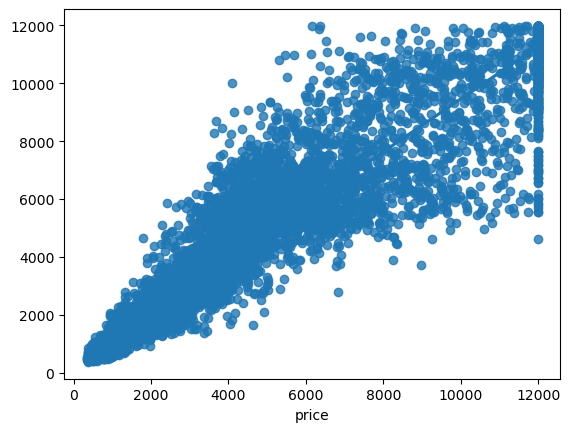

In [332]:
sns.regplot(y_test, y_pred_rfr_test)

# PCA :

In [333]:
from sklearn.decomposition import PCA

pca = PCA(n_components = len(x.columns))
pca.fit(x_train)

PCA(n_components=26)

In [334]:
pca.explained_variance_ratio_

array([5.11735052e-01, 2.36905991e-01, 1.27548014e-01, 8.15505677e-02,
       3.91378179e-02, 2.81723868e-03, 1.70289022e-04, 1.35029335e-04,
       3.70864948e-33, 3.70864948e-33, 3.70864948e-33, 3.70864948e-33,
       3.70864948e-33, 3.70864948e-33, 3.70864948e-33, 3.70864948e-33,
       3.70864948e-33, 3.70864948e-33, 3.70864948e-33, 3.70864948e-33,
       3.70864948e-33, 3.70864948e-33, 3.70864948e-33, 3.70864948e-33,
       3.70864948e-33, 3.70864948e-33])

In [335]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, 2))

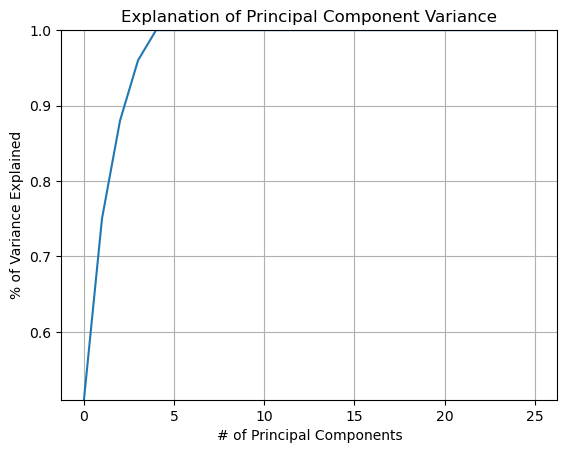

In [336]:
plt.ylabel('% of Variance Explained')
plt.xlabel('# of Principal Components')
plt.title('Explanation of Principal Component Variance')
plt.ylim(min(var),1)
plt.style.context('seaborn-whitegrid')
plt.grid(True)
plt.plot(var)
plt.show()

In [337]:
pca = PCA(n_components = 4)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

# 2. Applying PCA on RandomForest Regressor:

In [338]:
rfr_pca = RandomForestRegressor()

rfr_pca.fit(x_train_pca, y_train)

RandomForestRegressor()

In [339]:
y_pred_pcaRfr_train = rfr_pca.predict(x_train_pca)
y_pred_pcaRfr_test = rfr_pca.predict(x_test_pca)

# Model Evaluation :

In [340]:
r2_train = metrics.r2_score(y_train,y_pred_pcaRfr_train)
r2_test = metrics.r2_score(y_test,y_pred_pcaRfr_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9848320569178577
R2 score for test set is 0.8946487983481816


<AxesSubplot:xlabel='price'>

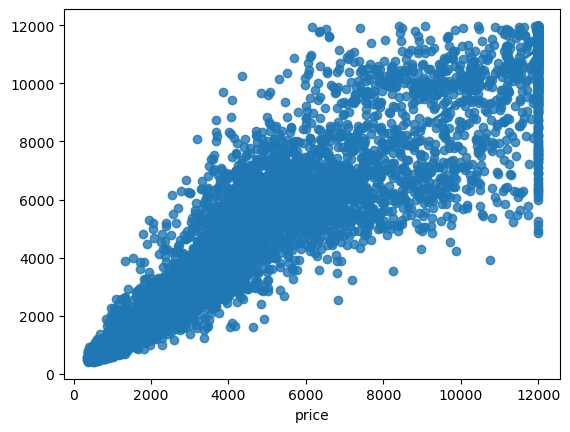

In [341]:
sns.regplot(y_test, y_pred_pcaRfr_test)

# 3. KNeighborsRegressor :

In [342]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors = 5)

In [343]:
kn.fit(x_train, y_train)

KNeighborsRegressor()

In [344]:
y_pred_kn_train = kn.predict(x_train)
y_pred_kn_test = kn.predict(x_test)

# Model Evaluation:

In [345]:
r2_train = metrics.r2_score(y_train,y_pred_kn_train)
r2_test = metrics.r2_score(y_test,y_pred_kn_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9265338030255171
R2 score for test set is 0.8889313719216676


<AxesSubplot:xlabel='price'>

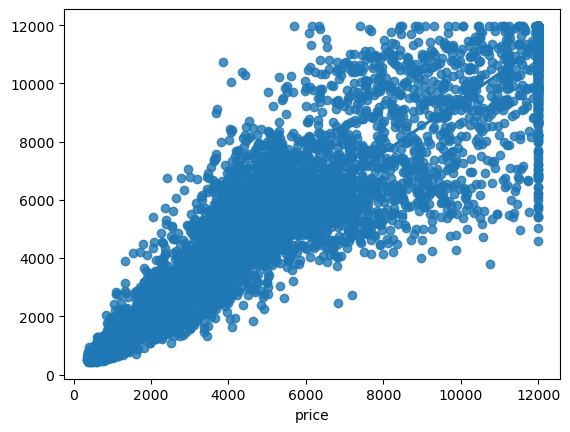

In [346]:
sns.regplot(y_test, y_pred_kn_test)

# 4. VotingRegressor :

In [347]:
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
r1 = RandomForestRegressor()
r2 = DecisionTreeRegressor()
r3 = LinearRegression()

er = VotingRegressor([('rf', r1), ('dt', r2), ('lr', r3)])

In [348]:
er.fit(x_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lr', LinearRegression())])

In [349]:
y_pred_vote_train = er.predict(x_train)
y_pred_vote_test = er.predict(x_test)

# Model Evaluation:

In [350]:
r2_train = metrics.r2_score(y_train,y_pred_vote_train)
r2_test = metrics.r2_score(y_test,y_pred_vote_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9777250170479598
R2 score for test set is 0.8925966093153102


<AxesSubplot:xlabel='price'>

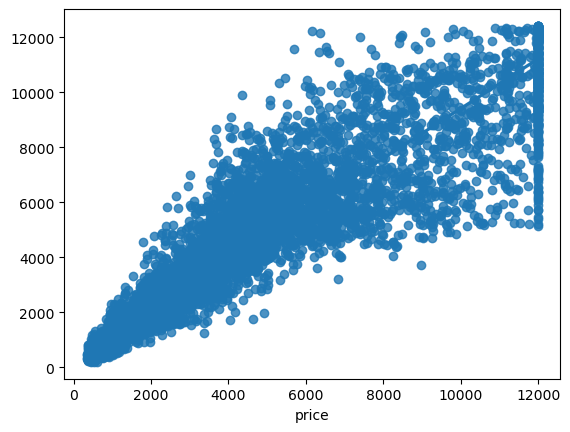

In [351]:
sns.regplot(y_test, y_pred_vote_test)

# 5. AdaBoostRegressor :

In [352]:
from sklearn.ensemble import AdaBoostRegressor

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

regr_ADA = AdaBoostRegressor(base_estimator = lr, n_estimators=100)

In [353]:
regr_ADA.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [354]:
y_pred_ADA_train = regr_ADA.predict(x_train)
y_pred_ADA_test = regr_ADA.predict(x_test)

# Model Evaluation:

In [355]:
r2_train = metrics.r2_score(y_train,y_pred_ADA_train)
r2_test = metrics.r2_score(y_test,y_pred_ADA_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.7825842324305465
R2 score for test set is 0.7816153069419367


# 6. BaggingRegressor :

In [356]:
from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor()

from sklearn.ensemble import BaggingRegressor

regr_BAG = BaggingRegressor(base_estimator=r1, n_estimators=10)

regr_BAG.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor())

In [357]:
y_pred_bag_train = regr_BAG.predict(x_train)
y_pred_bag_test = regr_BAG.predict(x_test)

# Model Evaluation:

In [358]:
r2_train = metrics.r2_score(y_train,y_pred_bag_train)
r2_test = metrics.r2_score(y_test,y_pred_bag_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))


R2 score for training set is 0.963273839581799
R2 score for test set is 0.9037151749270096


<AxesSubplot:xlabel='price'>

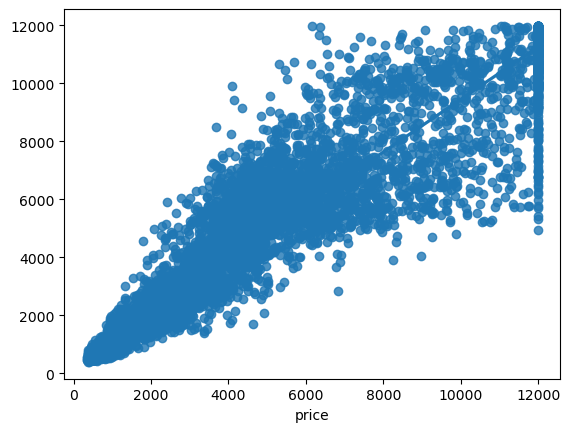

In [359]:
sns.regplot(y_test, y_pred_bag_test)

In [382]:
test_df = pd.read_csv('test_data.csv')

In [383]:
test_df.head()

,Index counter,carat,cut,color,clarity,depth,table,x,y,z
0,1389,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
1,50053,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26
2,41646,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95
3,42378,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98
4,17245,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61


In [384]:
test_df.shape

(16182, 10)

In [385]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16182 entries, 0 to 16181
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index counter  16182 non-null  int64  
 1   carat          16182 non-null  float64
 2   cut            16182 non-null  object 
 3   color          16182 non-null  object 
 4   clarity        16182 non-null  object 
 5   depth          16182 non-null  float64
 6   table          16182 non-null  float64
 7   x              16182 non-null  float64
 8   y              16182 non-null  float64
 9   z              16182 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [386]:
test_df.drop('Index counter', axis = 1, inplace = True)

In [387]:
test_df[test_df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z
853,0.38,Good,I,SI1,63.7,57.0,4.63,4.57,2.93
1629,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96
1692,0.50,Good,E,SI1,63.7,59.0,5.07,5.01,3.21
2654,0.70,Very Good,D,SI1,62.5,63.0,5.70,5.63,3.54
4164,0.32,Ideal,G,VS1,61.8,55.0,4.42,4.45,2.74
4190,1.02,Premium,H,SI2,59.2,59.0,6.57,6.54,3.88
4369,1.00,Ideal,H,SI1,61.4,55.0,6.49,6.44,3.97
4488,0.32,Ideal,E,VS2,62.1,55.0,4.40,4.36,2.72
5855,1.04,Good,G,VS2,61.4,65.0,6.53,6.47,3.99
5909,0.35,Fair,G,VS2,65.9,54.0,5.57,5.53,3.66


In [388]:
test_df.shape

(16182, 9)

In [389]:
test_df = pd.get_dummies(test_df)

In [390]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16182 entries, 0 to 16181
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          16182 non-null  float64
 1   depth          16182 non-null  float64
 2   table          16182 non-null  float64
 3   x              16182 non-null  float64
 4   y              16182 non-null  float64
 5   z              16182 non-null  float64
 6   cut_Fair       16182 non-null  uint8  
 7   cut_Good       16182 non-null  uint8  
 8   cut_Ideal      16182 non-null  uint8  
 9   cut_Premium    16182 non-null  uint8  
 10  cut_Very Good  16182 non-null  uint8  
 11  color_D        16182 non-null  uint8  
 12  color_E        16182 non-null  uint8  
 13  color_F        16182 non-null  uint8  
 14  color_G        16182 non-null  uint8  
 15  color_H        16182 non-null  uint8  
 16  color_I        16182 non-null  uint8  
 17  color_J        16182 non-null  uint8  
 18  clarit

In [391]:
test_df.skew()

carat            1.097574
depth           -0.042257
table            0.748723
x                0.365552
y                1.095691
z                0.348035
cut_Fair         5.501324
cut_Good         2.809204
cut_Ideal        0.404556
cut_Premium      1.118508
cut_Very Good    1.349390
color_D          2.244917
color_E          1.648014
color_F          1.718657
color_G          1.399283
color_H          1.960099
color_I          2.634338
color_J          4.040057
clarity_I1       8.246247
clarity_IF       5.186109
clarity_SI1      1.231895
clarity_SI2      1.724904
clarity_VS1      1.946597
clarity_VS2      1.303690
clarity_VVS1     3.462424
clarity_VVS2     2.746029
dtype: float64

carat


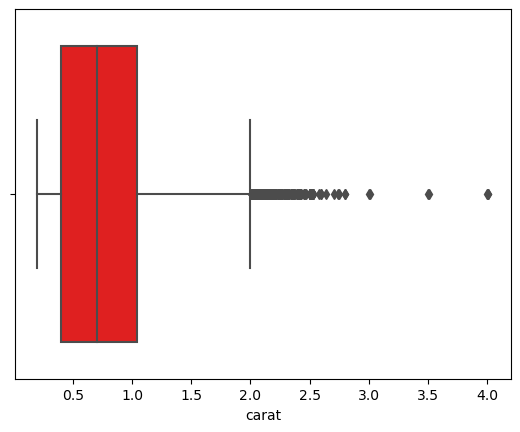

depth


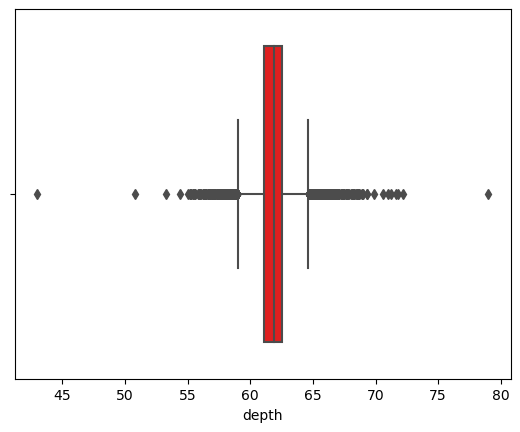

table


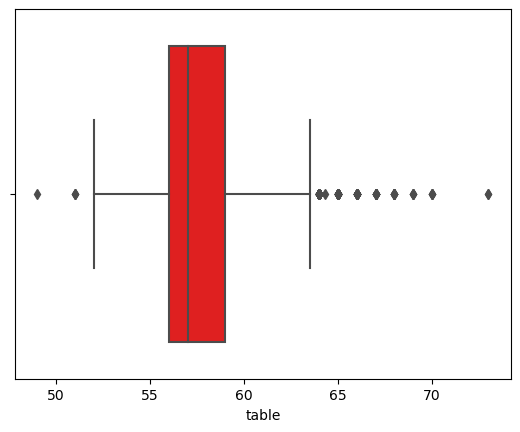

x


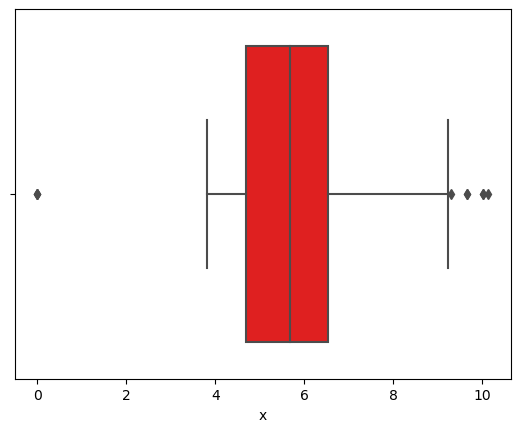

y


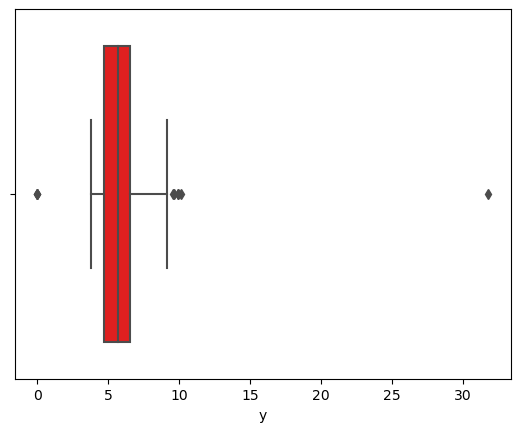

z


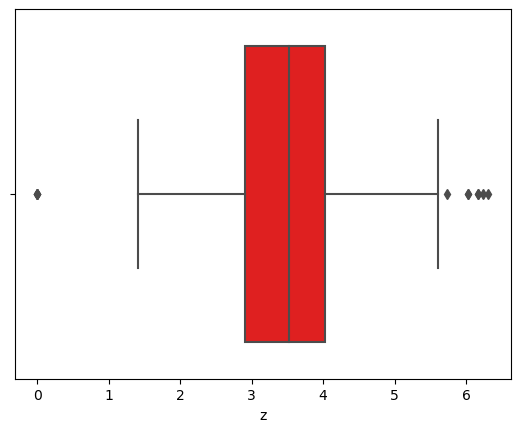

cut_Fair


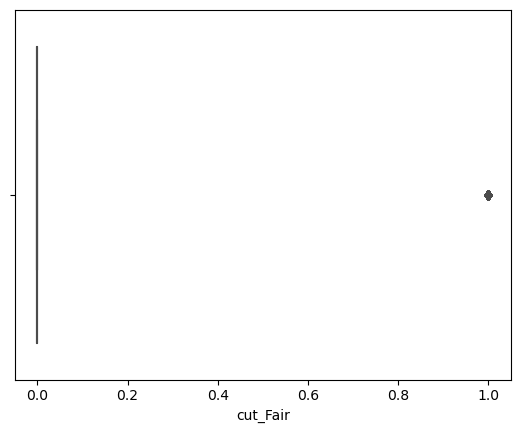

cut_Good


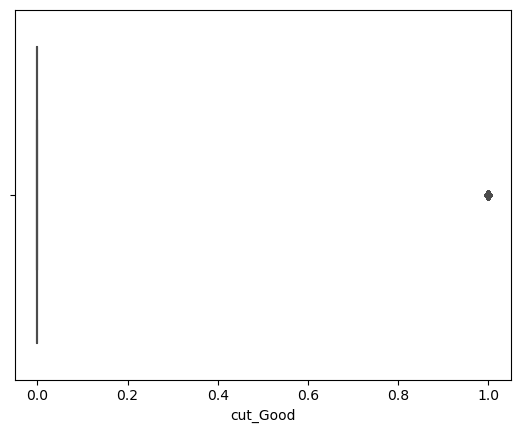

cut_Ideal


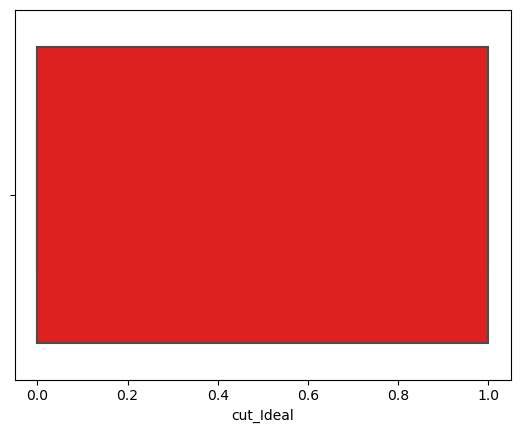

cut_Premium


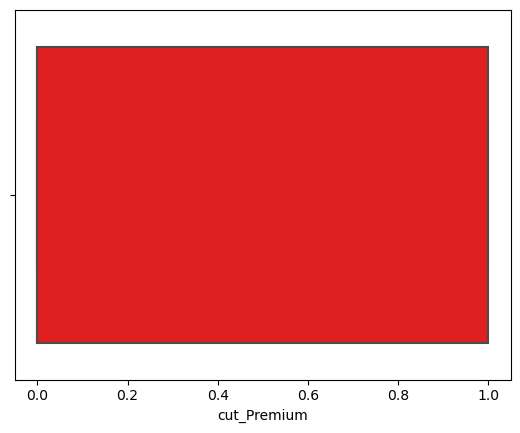

cut_Very Good


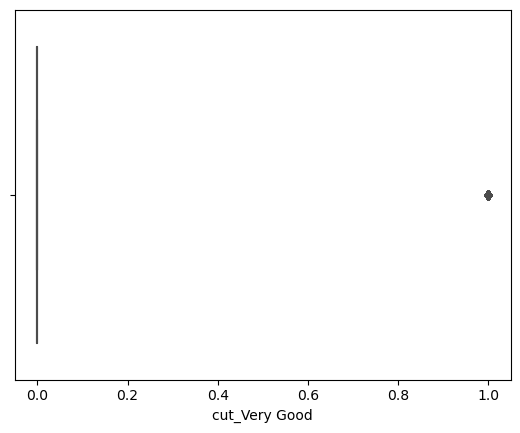

color_D


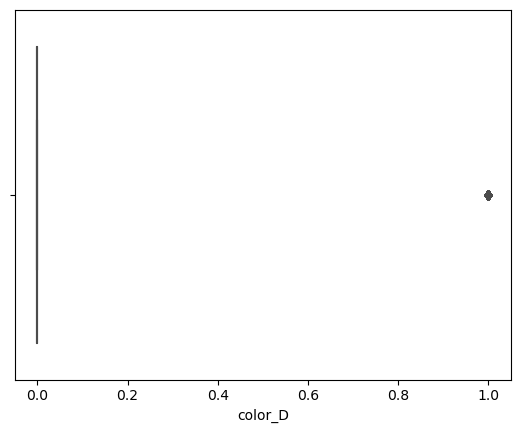

color_E


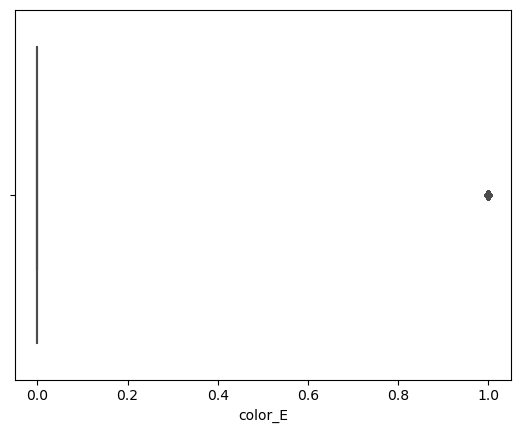

color_F


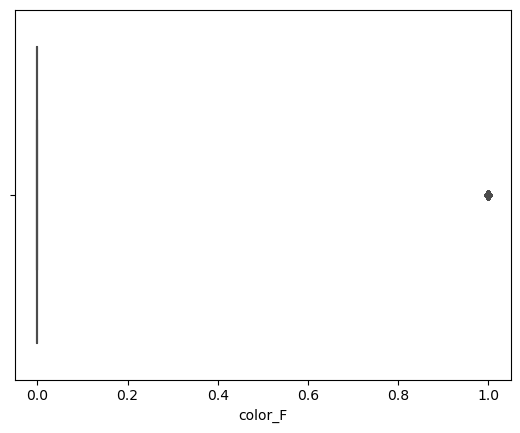

color_G


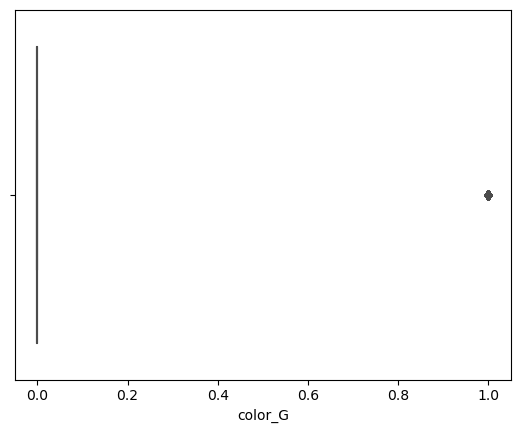

color_H


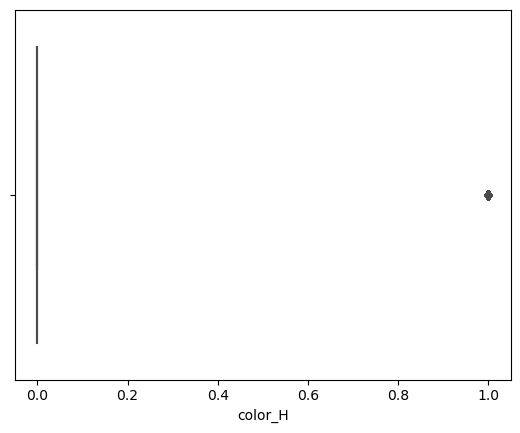

color_I


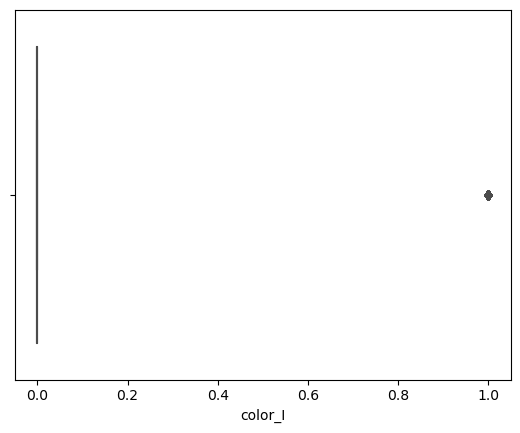

color_J


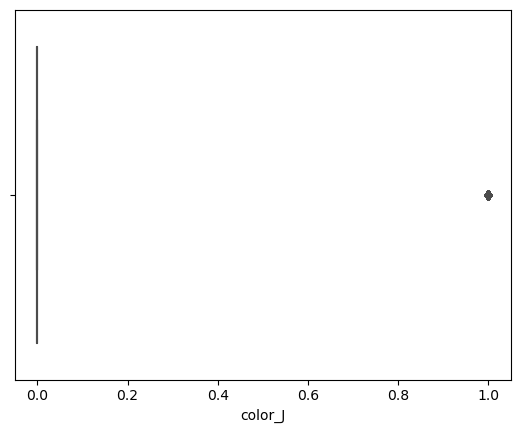

clarity_I1


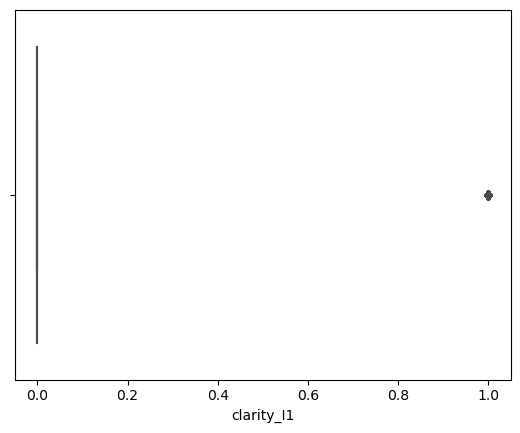

clarity_IF


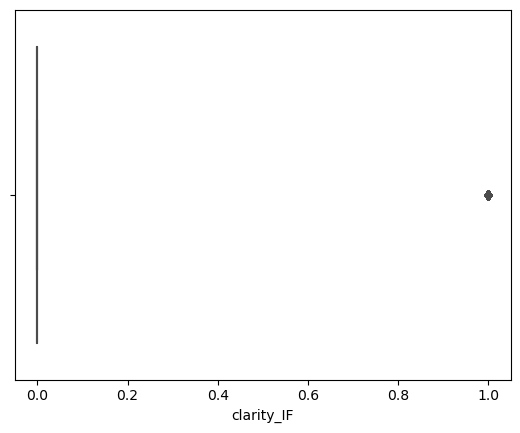

clarity_SI1


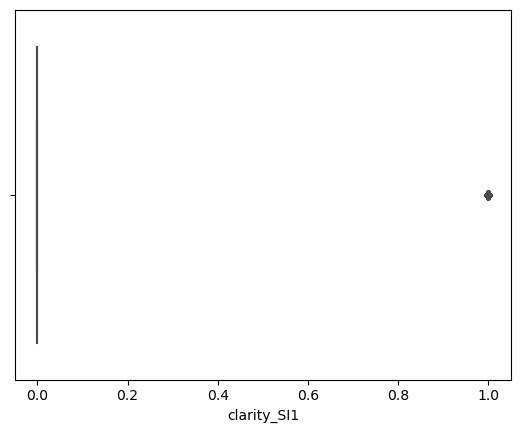

clarity_SI2


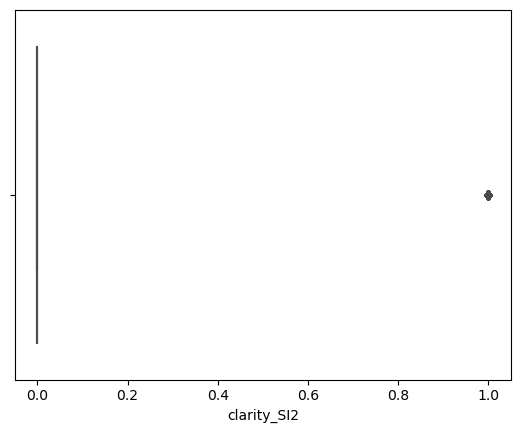

clarity_VS1


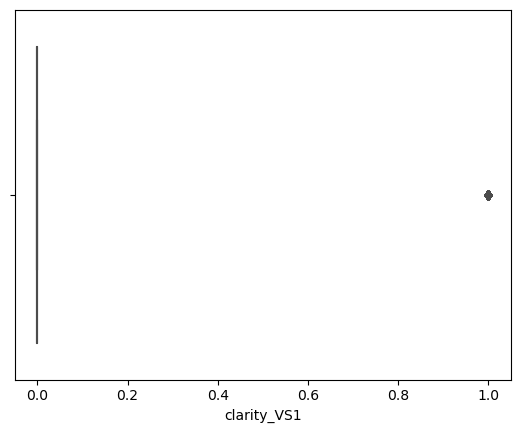

clarity_VS2


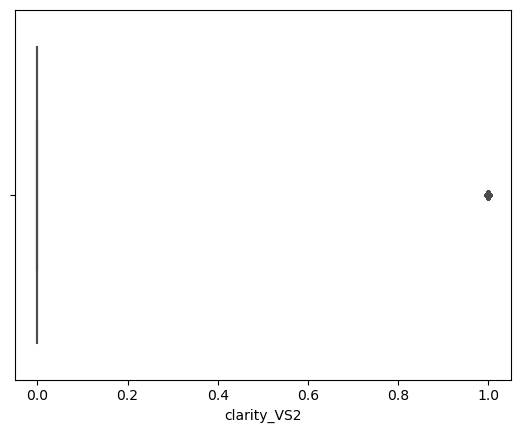

clarity_VVS1


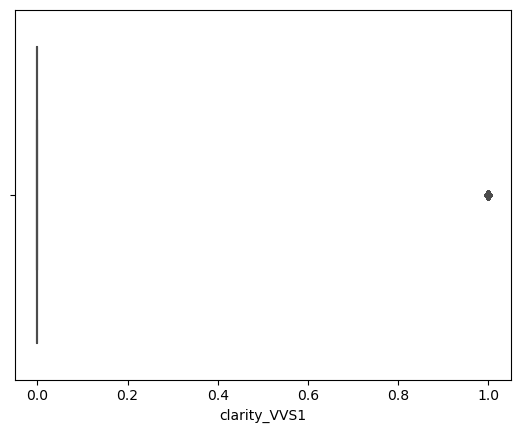

clarity_VVS2


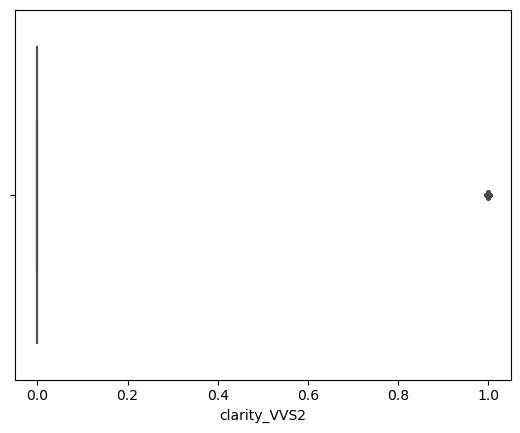

In [392]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [393]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

carat


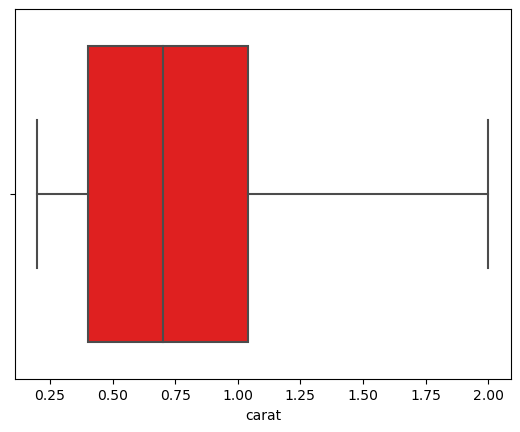

depth


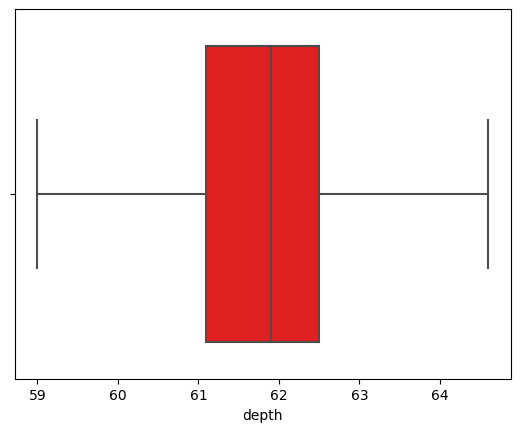

table


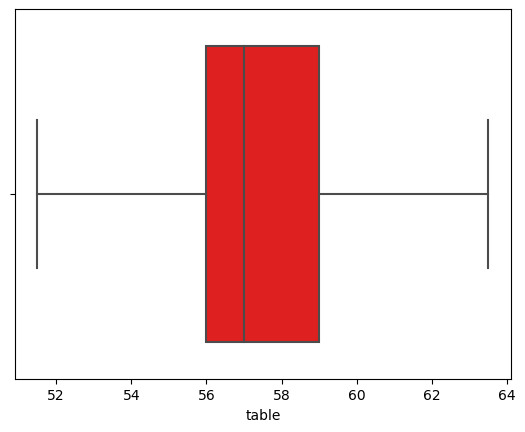

x


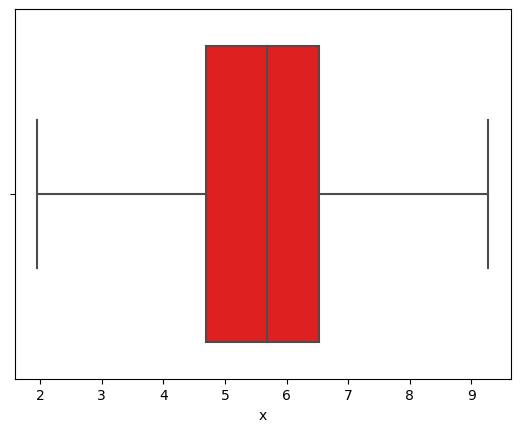

y


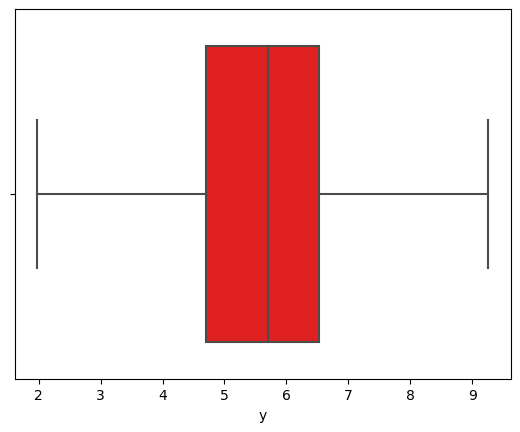

z


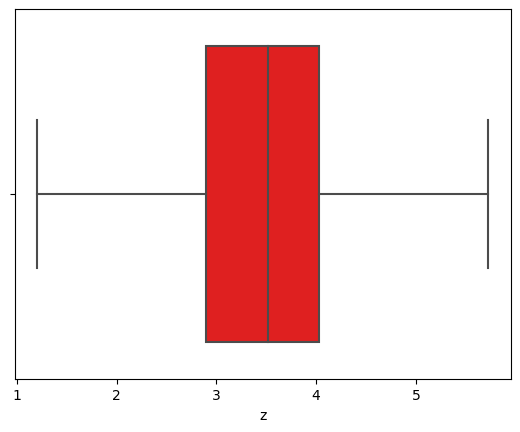

cut_Fair


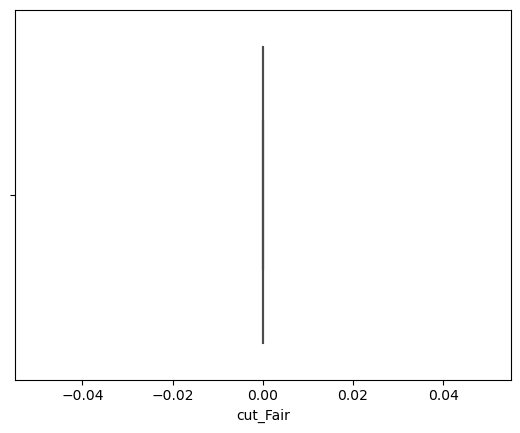

cut_Good


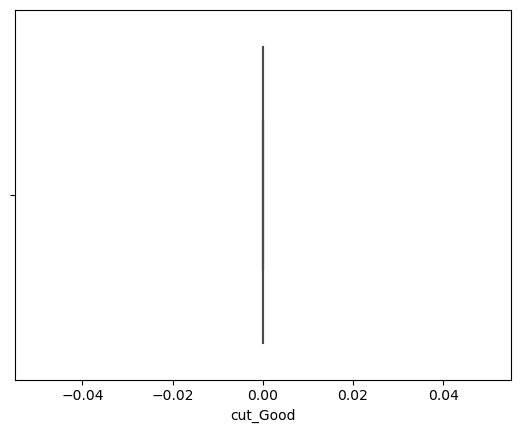

cut_Ideal


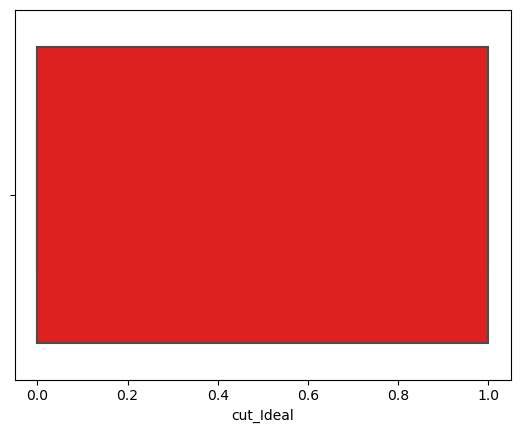

cut_Premium


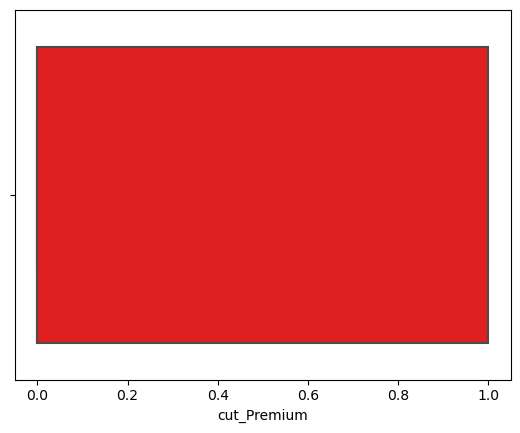

cut_Very Good


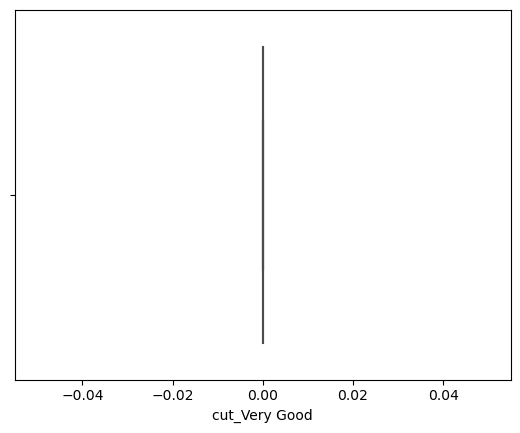

color_D


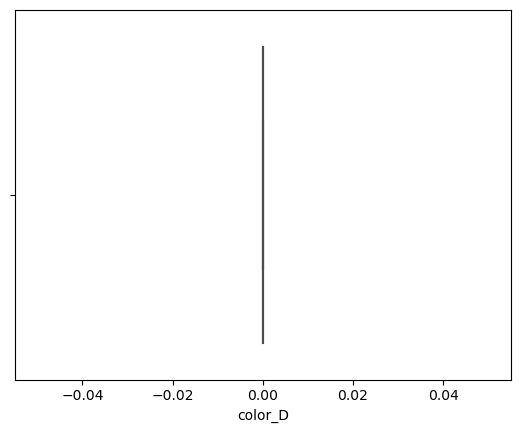

color_E


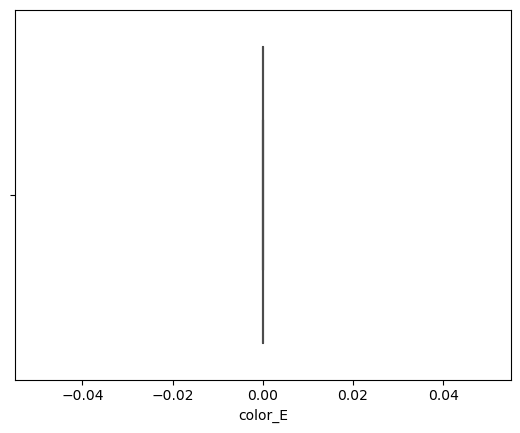

color_F


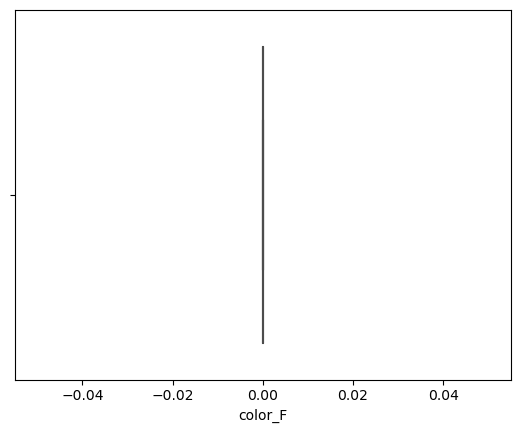

color_G


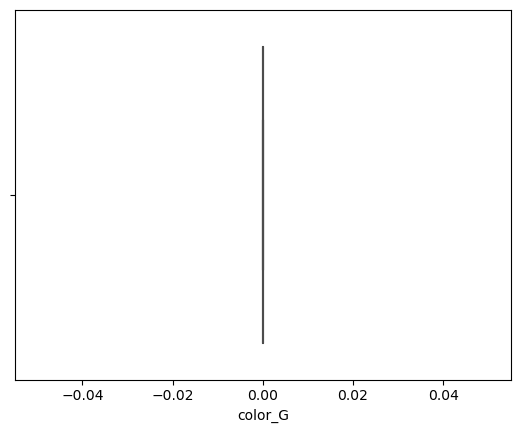

color_H


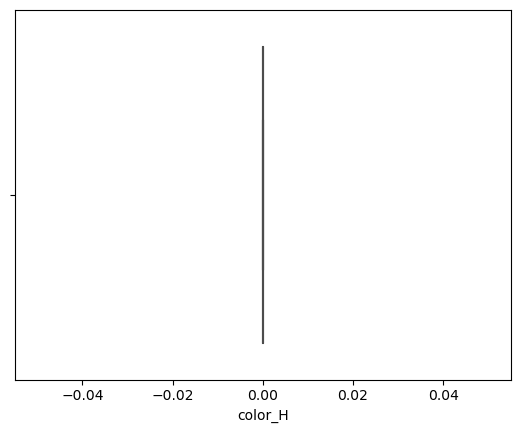

color_I


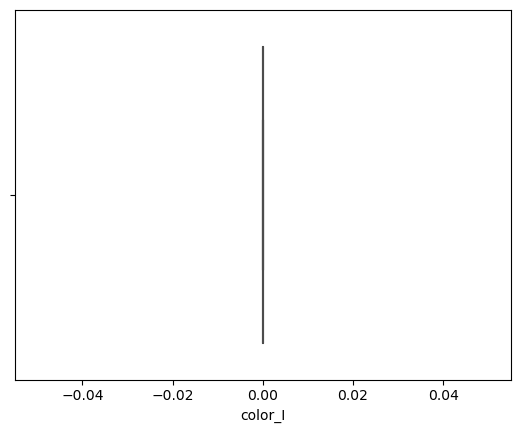

color_J


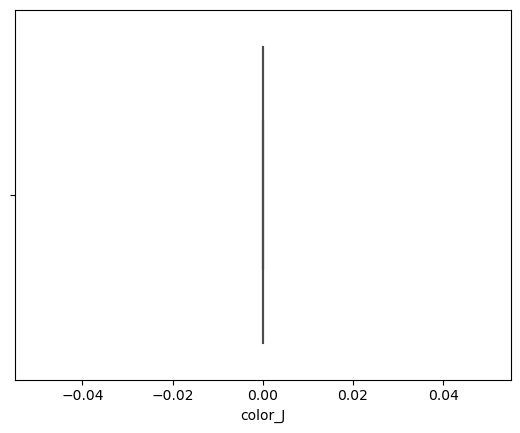

clarity_I1


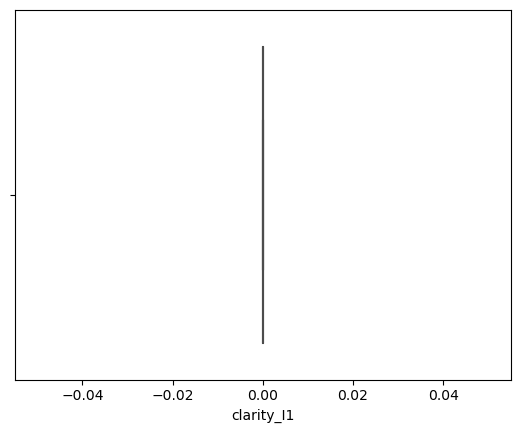

clarity_IF


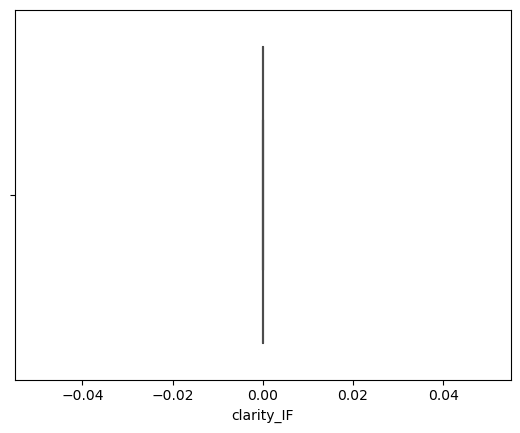

clarity_SI1


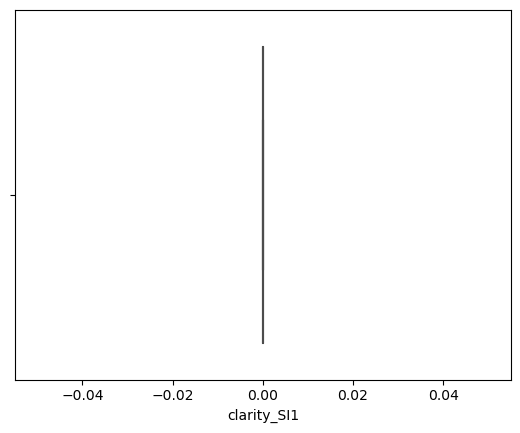

clarity_SI2


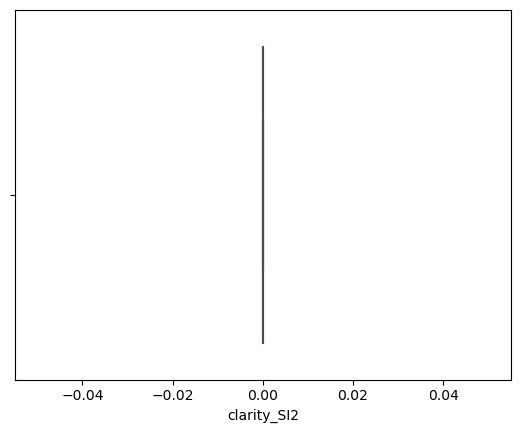

clarity_VS1


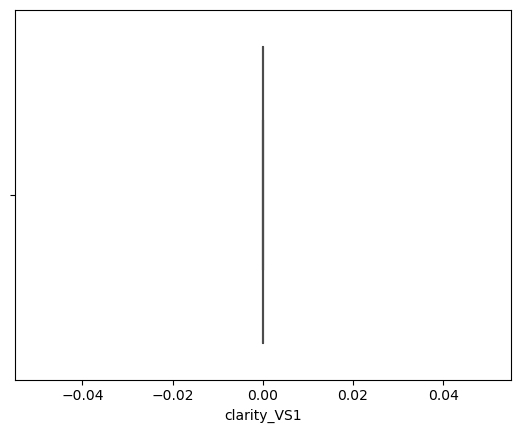

clarity_VS2


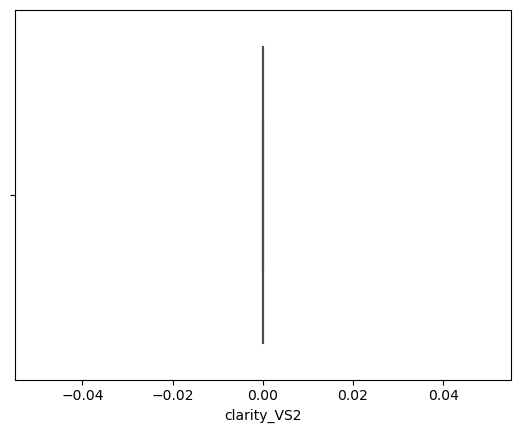

clarity_VVS1


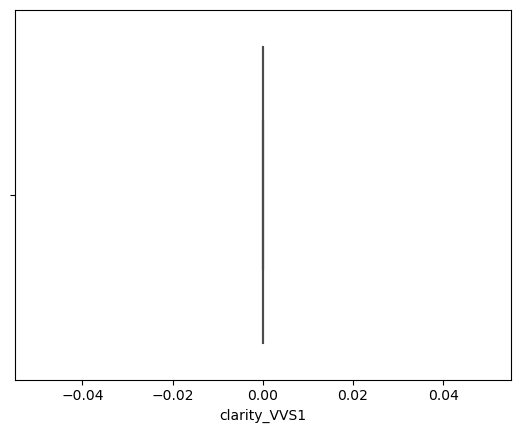

clarity_VVS2


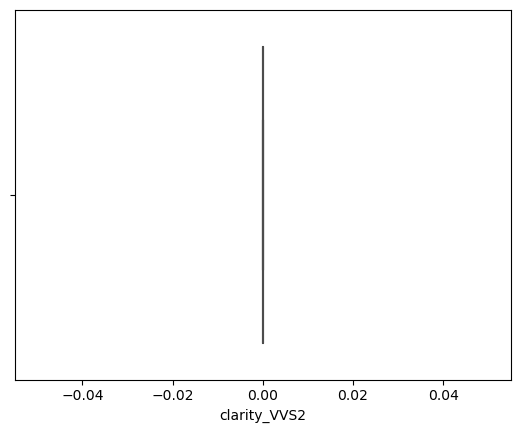

In [394]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [395]:
df_test.skew()

carat            0.899732
depth           -0.196221
table            0.490012
x                0.378699
y                0.376299
z                0.365277
cut_Fair         0.000000
cut_Good         0.000000
cut_Ideal        0.404556
cut_Premium      1.118508
cut_Very Good    0.000000
color_D          0.000000
color_E          0.000000
color_F          0.000000
color_G          0.000000
color_H          0.000000
color_I          0.000000
color_J          0.000000
clarity_I1       0.000000
clarity_IF       0.000000
clarity_SI1      0.000000
clarity_SI2      0.000000
clarity_VS1      0.000000
clarity_VS2      0.000000
clarity_VVS1     0.000000
clarity_VVS2     0.000000
dtype: float64

In [396]:
predicted_test = rfr.predict(df_test)

In [397]:
predicted_test

array([ 4505.93, 11285.11,  4490.41, ..., 11751.01, 11237.53,  4490.41])

In [401]:
df_test['Price'] = predicted_test

In [402]:
df_test.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,Price
0,0.24,62.1,56.0,3.97,4.00,2.47,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4505.93,4505.93
1,0.58,60.0,57.0,5.44,5.42,3.26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11285.11,11285.11
2,0.40,62.1,55.0,4.76,4.74,2.95,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4490.41,4490.41
3,0.43,60.8,57.0,4.92,4.89,2.98,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5336.98,5336.98
4,1.55,62.3,55.0,7.44,7.37,4.61,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11776.91,11776.91


In [405]:
df_test.drop('price', axis = 1, inplace = True)

In [406]:
df_test.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,Price
0,0.24,62.1,56.0,3.97,4.00,2.47,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4505.93
1,0.58,60.0,57.0,5.44,5.42,3.26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11285.11
2,0.40,62.1,55.0,4.76,4.74,2.95,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4490.41
3,0.43,60.8,57.0,4.92,4.89,2.98,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5336.98
4,1.55,62.3,55.0,7.44,7.37,4.61,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11776.91


In [407]:
list(zip(y_test, predicted_test))

[(1787.0, 4505.93),
 (1847.0, 11285.11),
 (6093.0, 4490.41),
 (622.0, 5336.98),
 (4777.0, 11776.91),
 (789.0, 11150.84),
 (3066.0, 11381.95),
 (4161.0, 11381.95),
 (6889.0, 11256.32),
 (3580.0, 11463.23),
 (2304.0, 4490.41),
 (3751.0, 11751.01),
 (6871.0, 11285.11),
 (11976.0, 11237.53),
 (6838.0, 11285.11),
 (720.0, 11776.91),
 (491.0, 11153.7),
 (6108.0, 4490.41),
 (11976.0, 11751.01),
 (11976.0, 3406.0),
 (5022.0, 11793.02),
 (3448.0, 3408.87),
 (1810.0, 4450.3133333333335),
 (2234.0, 4450.3133333333335),
 (6416.0, 11435.64),
 (857.0, 11381.95),
 (11976.0, 4435.71),
 (832.0, 11793.02),
 (675.0, 11461.75),
 (3777.0, 4505.93),
 (2233.0, 11398.38),
 (2859.0, 11256.32),
 (2160.0, 11793.02),
 (4891.0, 11285.11),
 (5045.0, 11285.11),
 (11170.0, 4450.3133333333335),
 (3907.0, 4450.3133333333335),
 (5405.0, 11285.11),
 (3062.0, 11285.11),
 (3334.0, 11793.02),
 (2347.0, 11381.95),
 (800.0, 11285.11),
 (7465.0, 3408.87),
 (3077.0, 11793.02),
 (6159.0, 11381.95),
 (1076.0, 3420.32),
 (450.0, 1

In [408]:
df_test.to_csv('submission_diamond.csv', index = False, header = False)